EDA assignment

In [2]:
import pandas as pd

In [28]:
 bike_data = pd.read_csv('BIKE DETAILS.csv')


In [32]:
#1 What is the range of selling prices in the dataset ?

selling_price_min = bike_data['selling_price'].min()
selling_price_max = bike_data['selling_price'].max()

selling_price_range = selling_price_max - selling_price_min

print(f"Minimum Selling Price: {selling_price_min}")
print(f"Maximum Selling Price: {selling_price_max}")
print(f"Range of Selling Price: {selling_price_range}")


Minimum Selling Price: 5000
Maximum Selling Price: 760000
Range of Selling Price: 755000


In [34]:
#2. What is the median selling price for bikes in the dataset ?

median_selling_price = bike_data['selling_price'].median()

print(f"Median Selling Price: {median_selling_price}")


Median Selling Price: 45000.0


In [36]:
#3. What is the most common seller type ?
# Find the most common seller type
most_common_seller_type = bike_data['seller_type'].mode()[0]

print(f"The most common seller type is: {most_common_seller_type}")



The most common seller type is: Individual


In [39]:
#4. How many bikes have driven more than 50,000 kilometers ?

bikes_over_50000_km = bike_data[bike_data['km_driven'] > 50000]

count_bikes_over_50000_km = bikes_over_50000_km.shape[0]

print(f"Number of bikes driven more than 50,000 kilometers: {count_bikes_over_50000_km}")


Number of bikes driven more than 50,000 kilometers: 170


In [45]:
#5. What is the average km_driven value for each ownership type ?
median_km_driven_by_owner = bike_data.groupby('owner')['km_driven'].median()

print(median_km_driven_by_owner)


owner
1st owner    24000.0
2nd owner    34000.0
3rd owner    35000.0
4th owner    48000.0
Name: km_driven, dtype: float64


In [50]:
#6.  What proportion of bikes are from the year 2015 or older ?
# Filter the bikes with year 2015 or older
bikes_2015_or_older = bike_data[bike_data['year'] <= 2015]

# Count the number of bikes 2015 or older
count_bikes_2015_or_older = bikes_2015_or_older.shape[0]

# Calculate the total number of bikes
total_bikes = bike_data.shape[0]

# Calculate the proportion
proportion_2015_or_older = count_bikes_2015_or_older / total_bikes

print(f"Proportion of bikes from 2015 or older: {proportion_2015_or_older:.2f}")


Proportion of bikes from 2015 or older: 0.57


In [52]:
#7. What is the trend of missing values across the dataset ?
# Check the count of missing values for each column
missing_values = bike_data.isnull().sum()

# Calculate the proportion of missing values for each column
missing_proportion = bike_data.isnull().mean()

# Display the missing values count and proportion
print("Missing Values Count per Column:\n", missing_values)
print("\nProportion of Missing Values per Column:\n", missing_proportion)


Missing Values Count per Column:
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Proportion of Missing Values per Column:
 name                 0.000000
selling_price        0.000000
year                 0.000000
seller_type          0.000000
owner                0.000000
km_driven            0.000000
ex_showroom_price    0.409991
dtype: float64


In [54]:
#8.What is the highest ex_showroom_price recorded, and for which bike ?
# Find the highest ex_showroom_price
max_ex_showroom_price = bike_data['ex_showroom_price'].max()

# Find the bike(s) with the highest ex_showroom_price
bike_with_max_price = bike_data[bike_data['ex_showroom_price'] == max_ex_showroom_price]

# Display the result
print(f"Highest ex_showroom_price: {max_ex_showroom_price}")
print("Bike with the highest ex_showroom_price:\n", bike_with_max_price[['name', 'ex_showroom_price']])


Highest ex_showroom_price: 1278000.0
Bike with the highest ex_showroom_price:
                            name  ex_showroom_price
134  Harley-Davidson Street Bob          1278000.0


In [56]:
#9. What is the total number of bikes listed by each seller type ?
# Group by seller_type and count the number of bikes listed by each seller type
seller_type_counts = bike_data['seller_type'].value_counts()

# Display the result
print("Total number of bikes listed by each seller type:")
print(seller_type_counts)


Total number of bikes listed by each seller type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


In [58]:
#10.  What is the relationship between selling_price and km_driven for first-owner bikes ?
# Filter for bikes where the owner is "1st owner"
first_owner_bikes = bike_data[bike_data['owner'] == '1st owner']



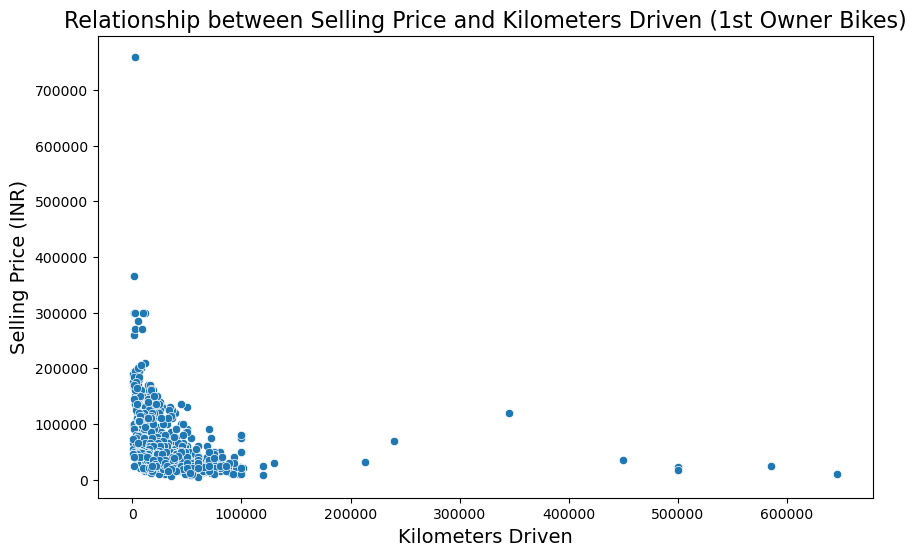

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the relationship between selling_price and km_driven for 1st owner bikes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='km_driven', y='selling_price', data=first_owner_bikes)

# Adding titles and labels
plt.title('Relationship between Selling Price and Kilometers Driven (1st Owner Bikes)', fontsize=16)
plt.xlabel('Kilometers Driven', fontsize=14)
plt.ylabel('Selling Price (INR)', fontsize=14)

# Show the plot
plt.show()


In [62]:
# Calculate the correlation between selling_price and km_driven for first-owner bikes
correlation = first_owner_bikes['selling_price'].corr(first_owner_bikes['km_driven'])

print(f"Correlation between selling_price and km_driven for 1st owner bikes: {correlation:.2f}")


Correlation between selling_price and km_driven for 1st owner bikes: -0.24


In [64]:
#11.  Identify and remove outliers in the km_driven column using the IQR method ?
# Calculate the 1st quartile (Q1) and the 3rd quartile (Q3) for 'km_driven'
Q1 = bike_data['km_driven'].quantile(0.25)
Q3 = bike_data['km_driven'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
bike_data_no_outliers = bike_data[(bike_data['km_driven'] >= lower_bound) & (bike_data['km_driven'] <= upper_bound)]

# Display the result
print(f"Original dataset shape: {bike_data.shape}")
print(f"Dataset shape after removing outliers: {bike_data_no_outliers.shape}")


Original dataset shape: (1061, 7)
Dataset shape after removing outliers: (1022, 7)


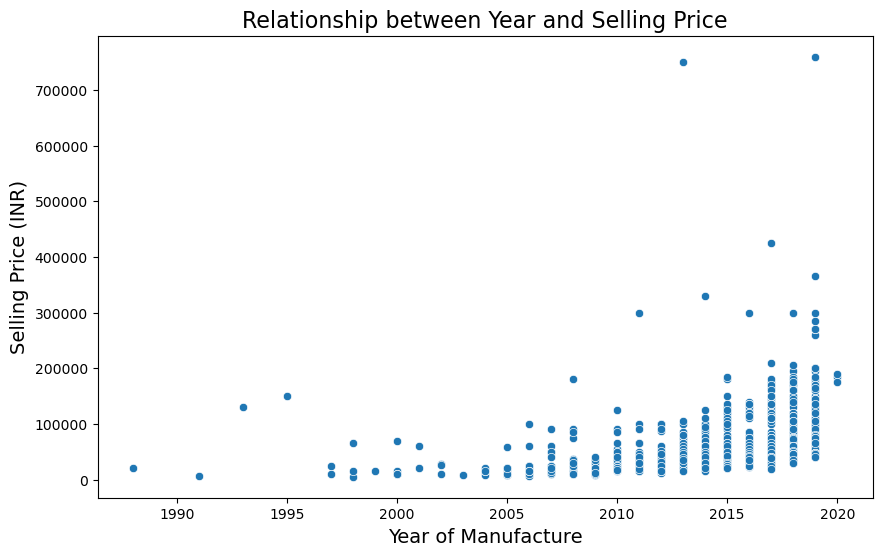

In [66]:
#12.Perform a bivariate analysis to visualize the relationship between year and selling_price?
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for the relationship between year and selling_price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=bike_data)

# Add titles and labels
plt.title('Relationship between Year and Selling Price', fontsize=16)
plt.xlabel('Year of Manufacture', fontsize=14)
plt.ylabel('Selling Price (INR)', fontsize=14)

# Show the plot
plt.show()


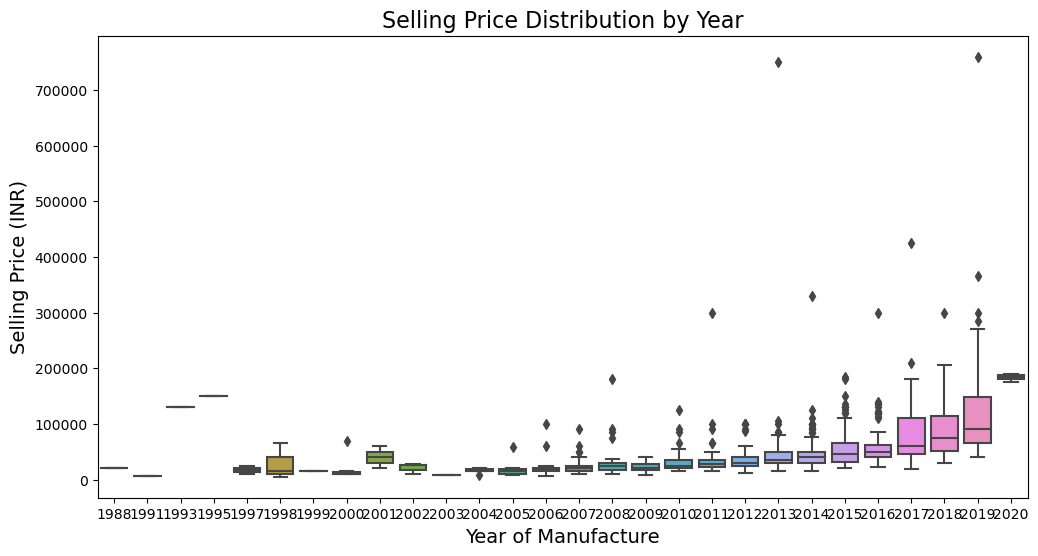

In [68]:
# Box plot for the distribution of selling_price across different years
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='selling_price', data=bike_data)

# Add titles and labels
plt.title('Selling Price Distribution by Year', fontsize=16)
plt.xlabel('Year of Manufacture', fontsize=14)
plt.ylabel('Selling Price (INR)', fontsize=14)

# Show the plot
plt.show()


In [70]:
#13.What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?
# Get the current year
current_year = 2025  # You can dynamically get this with: current_year = pd.Timestamp.now().year

# Calculate the bike's age
bike_data['age'] = current_year - bike_data['year']

# Group by age and calculate the average selling price for each age
average_price_by_age = bike_data.groupby('age')['selling_price'].mean()

# Display the result
print("Average Selling Price by Bike Age:")
print(average_price_by_age)



Average Selling Price by Bike Age:
age
5     183333.333333
6     119689.511628
7      87660.374046
8      78894.736842
9      58469.018692
10     56500.000000
11     48668.131868
12     51136.986301
13     35748.400000
14     35655.721311
15     31793.333333
16     22267.857143
17     34289.285714
18     24927.586207
19     23380.000000
20     16978.571429
21     15100.000000
22      8000.000000
23     20666.666667
24     40000.000000
25     20833.333333
26     15000.000000
27     28333.333333
28     17500.000000
30    150000.000000
32    130000.000000
34      6000.000000
37     20000.000000
Name: selling_price, dtype: float64


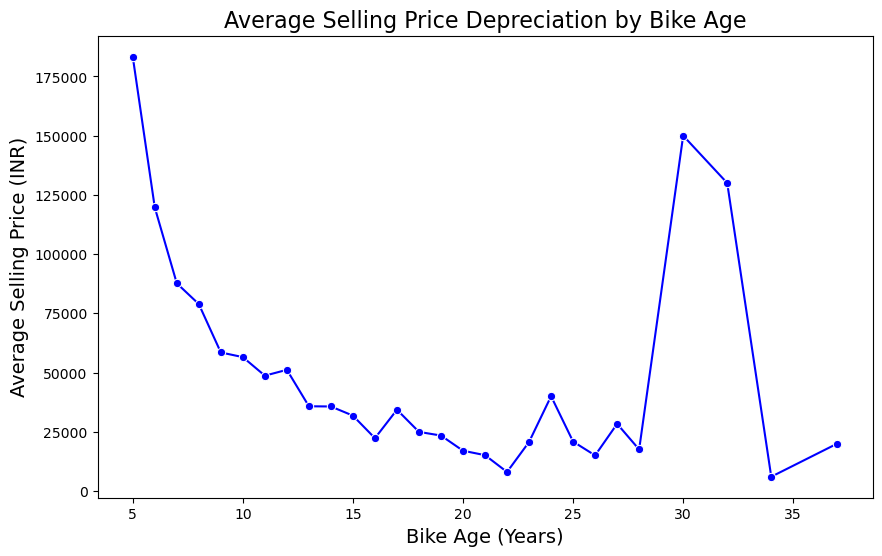

In [72]:
# Plotting the average selling price by age
plt.figure(figsize=(10, 6))
sns.lineplot(x=average_price_by_age.index, y=average_price_by_age.values, marker='o', color='b')

# Adding titles and labels
plt.title('Average Selling Price Depreciation by Bike Age', fontsize=16)
plt.xlabel('Bike Age (Years)', fontsize=14)
plt.ylabel('Average Selling Price (INR)', fontsize=14)

# Show the plot
plt.show()


In [74]:
#14.Which bike names are priced significantly above the average price for their manufacturing year?
# Calculate the average selling price and standard deviation for each year
price_stats_by_year = bike_data.groupby('year')['selling_price'].agg(['mean', 'std'])

# Merge this with the original dataset to have the mean and std for each bike's manufacturing year
bike_data_with_stats = bike_data.merge(price_stats_by_year, on='year', how='left')

# Calculate a threshold for "significantly above average" (mean + 1 standard deviation)
bike_data_with_stats['threshold'] = bike_data_with_stats['mean'] + bike_data_with_stats['std']

# Filter bikes that are priced significantly above the threshold
above_average_bikes = bike_data_with_stats[bike_data_with_stats['selling_price'] > bike_data_with_stats['threshold']]

# Display the result (bike names and their selling prices)
result = above_average_bikes[['name', 'year', 'selling_price', 'mean', 'std']]
print("Bikes Priced Significantly Above the Average Price for Their Manufacturing Year:")
print(result)


Bikes Priced Significantly Above the Average Price for Their Manufacturing Year:
                                     name  year  selling_price           mean  \
2     Royal Enfield Classic Gunmetal Grey  2018         150000   87660.374046   
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000   34289.285714   
13                          Yamaha YZF R3  2019         365000  119689.511628   
18    Royal Enfield Classic Gunmetal Grey  2018         150000   87660.374046   
24          Royal Enfield Thunderbird 350  2016         110000   58469.018692   
..                                    ...   ...            ...            ...   
976             Royal Enfield Classic 350  2015         110000   56500.000000   
979             Royal Enfield Thunder 500  2015         105000   56500.000000   
983             Royal Enfield Classic 350  2015         100000   56500.000000   
984             Royal Enfield Classic 500  2014          95000   48668.131868   
985             Royal Enfiel

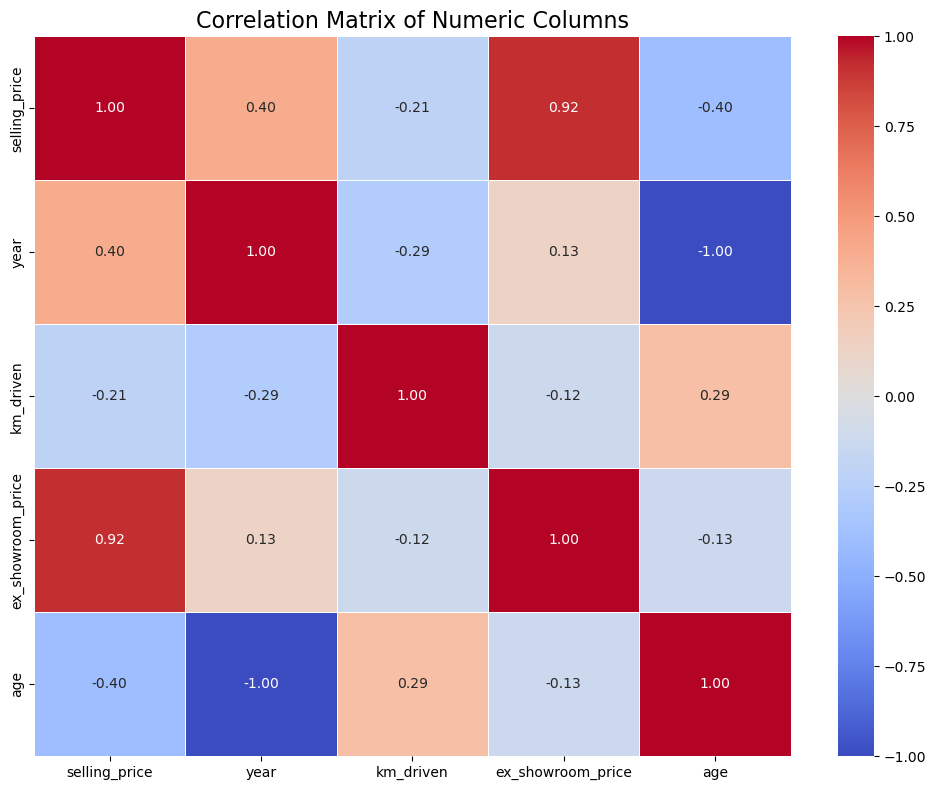

In [78]:
#15. B Develop a correlation matrix for numeric columns and visualize it using a heatmap.
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns for correlation calculation
numeric_cols = bike_data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix for numeric columns
correlation_matrix = bike_data[numeric_cols].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and labels
plt.title('Correlation Matrix of Numeric Columns', fontsize=16)
plt.tight_layout()

# Show the heatmap
plt.show()



EDA-2 Car Sales

In [80]:
 car_data = pd.read_csv('Car Sale.csv')

                                        Dealer_Name     Price ($)
27                                        U-Haul CO  28769.919006
5                                     Classic Chevy  28602.014446
19                             Rabun Used Car Sales  28527.536177
11                                  Iceberg Rentals  28522.958533
8                             Enterprise Rent A Car  28312.580800
23                Scrivener Performance Engineering  28297.371589
9                        Gartner Buick Hyundai Saab  28247.621019
22                                 Saab-Belle Dodge  28190.139888
2                                       Capitol KIA  28189.703822
20                                    Race Car Help  28163.372706
4                            Chrysler of Tri-Cities  28123.091054
24                             Star Enterprises Inc  28113.055244
25                                    Suburban Ford  28112.206758
1                                  C & M Motors Inc  28111.755200
26        

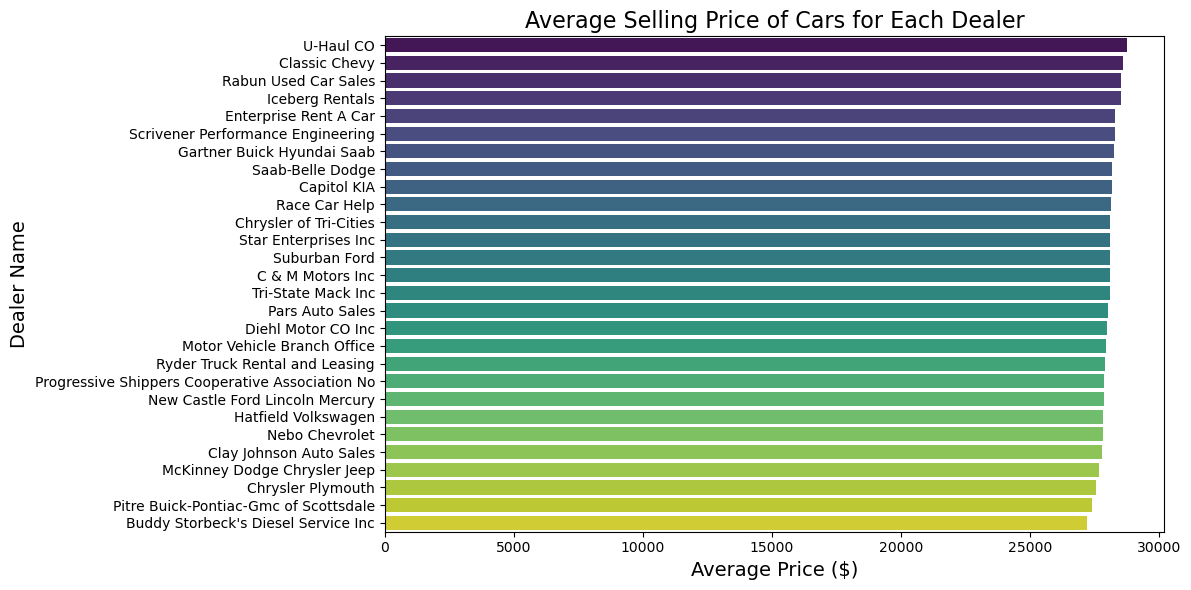

In [84]:
#1.What is the average selling price of cars for each dealer, and how does it compare across different dealers?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the dataset is loaded into a DataFrame 'car_data'
# Group the data by Dealer_Name and calculate the mean of Price ($)
dealer_avg_price = car_data.groupby('Dealer_Name')['Price ($)'].mean().reset_index()

# Sort the dealers by average price in descending order for better comparison
dealer_avg_price = dealer_avg_price.sort_values('Price ($)', ascending=False)

# Display the result
print(dealer_avg_price)

# Visualizing the comparison using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Price ($)', y='Dealer_Name', data=dealer_avg_price, palette='viridis')
plt.title('Average Selling Price of Cars for Each Dealer', fontsize=16)
plt.xlabel('Average Price ($)', fontsize=14)
plt.ylabel('Dealer Name', fontsize=14)
plt.tight_layout()
plt.show()


       Company     Price ($)
15     Lincoln  19658.050211
24        Saab  19653.740089
4     Cadillac  19517.120220
21    Plymouth  19065.997338
14       Lexus  17852.923492
3        Buick  17142.232626
17     Mercury  16445.172195
19      Nissan  16214.264017
25      Saturn  15990.223671
8         Ford  15849.090227
16  Mercedes-B  15722.807459
20  Oldsmobile  15711.345857
27      Toyota  15367.131714
2          BMW  15065.578723
22     Pontiac  14348.963592
11    Infiniti  13696.332844
5    Chevrolet  13311.063223
29       Volvo  12933.790185
26      Subaru  12920.771620
1         Audi  12904.243867
28  Volkswagen  12527.124011
18  Mitsubishi  11671.343035
6     Chrysler  11583.286811
7        Dodge  11187.592085
9        Honda  11148.629062
12      Jaguar  10222.531533
13        Jeep   9459.834418
0        Acura   8183.046414
23     Porsche   5261.839206
10     Hyundai   3485.982649

Car Brand with the Highest Price Variation:
Company           Lincoln
Price ($)    19658.050211
Name

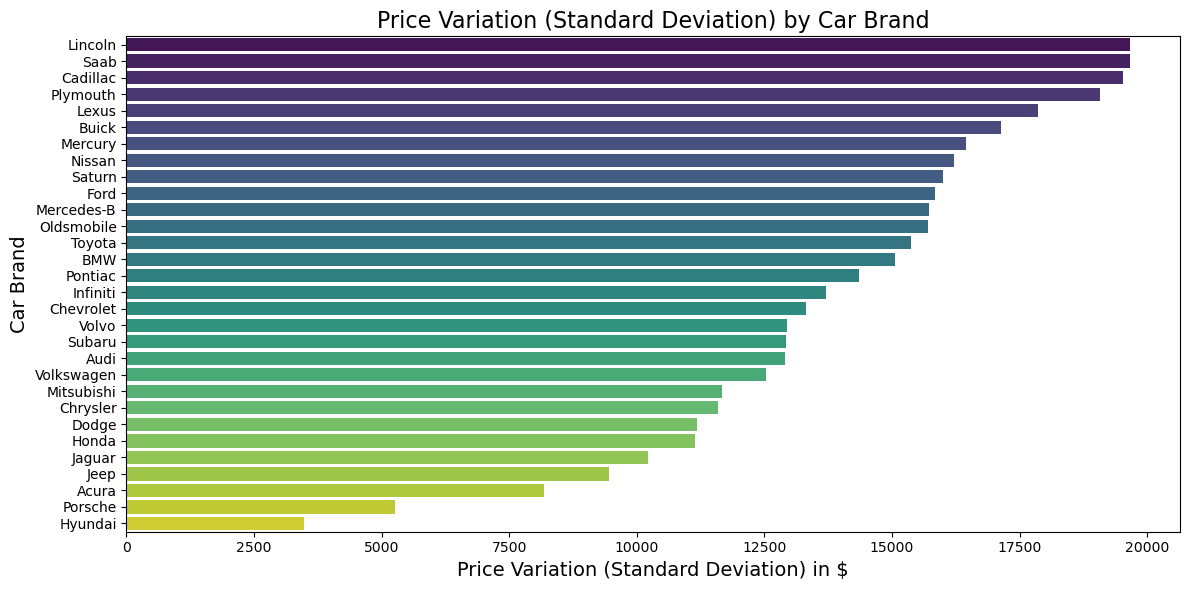

In [86]:
#2.Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
# Group the data by 'Company' and calculate the standard deviation of the Price
brand_price_variation = car_data.groupby('Company')['Price ($)'].std().reset_index()

# Sort the results in descending order to find the car brand with the highest variation
brand_price_variation = brand_price_variation.sort_values('Price ($)', ascending=False)

# Display the result
print(brand_price_variation)

# Identify the car brand with the highest price variation
highest_variation_brand = brand_price_variation.iloc[0]
print("\nCar Brand with the Highest Price Variation:")
print(highest_variation_brand)

# Visualizing the price variation for each car brand using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Price ($)', y='Company', data=brand_price_variation, palette='viridis')
plt.title('Price Variation (Standard Deviation) by Car Brand', fontsize=16)
plt.xlabel('Price Variation (Standard Deviation) in $', fontsize=14)
plt.ylabel('Car Brand', fontsize=14)
plt.tight_layout()
plt.show()


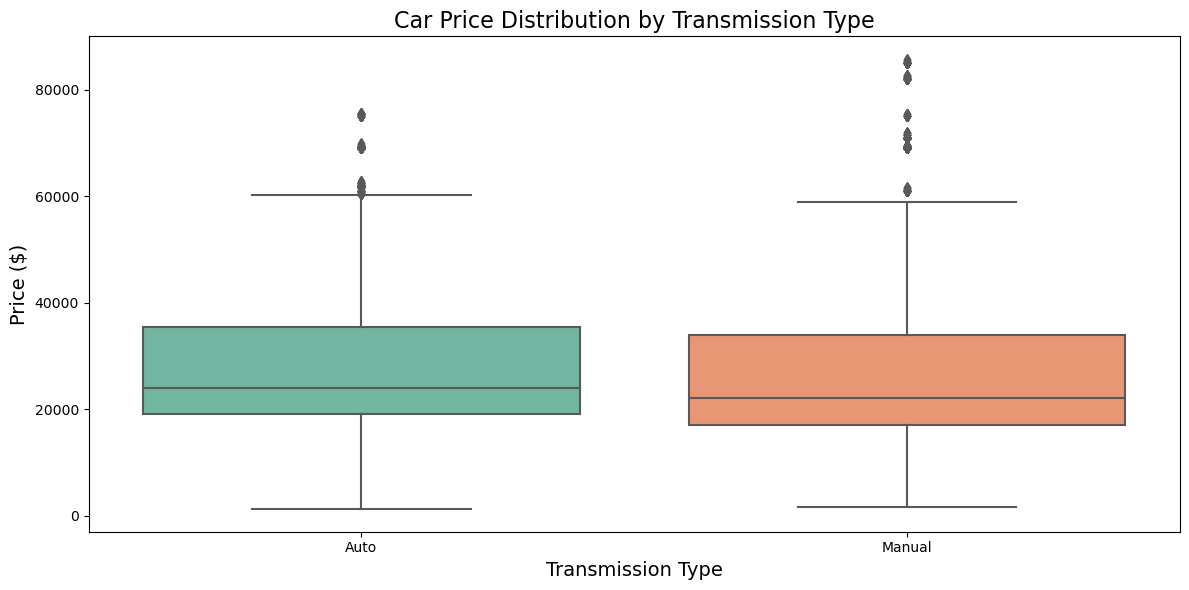

                  IQR
Transmission         
Auto          16500.0
Manual        17000.0


In [88]:
#3.What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the dataset is loaded into a DataFrame 'car_data'
# Boxplot showing the distribution of prices by Transmission type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=car_data, palette='Set2')
plt.title('Car Price Distribution by Transmission Type', fontsize=16)
plt.xlabel('Transmission Type', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.tight_layout()
plt.show()

# Calculate the IQR for each transmission type
iqr_values = car_data.groupby('Transmission')['Price ($)'].quantile([0.25, 0.75]).unstack()
iqr_values['IQR'] = iqr_values[0.75] - iqr_values[0.25]

# Display IQR values for each transmission type
print(iqr_values[['IQR']])


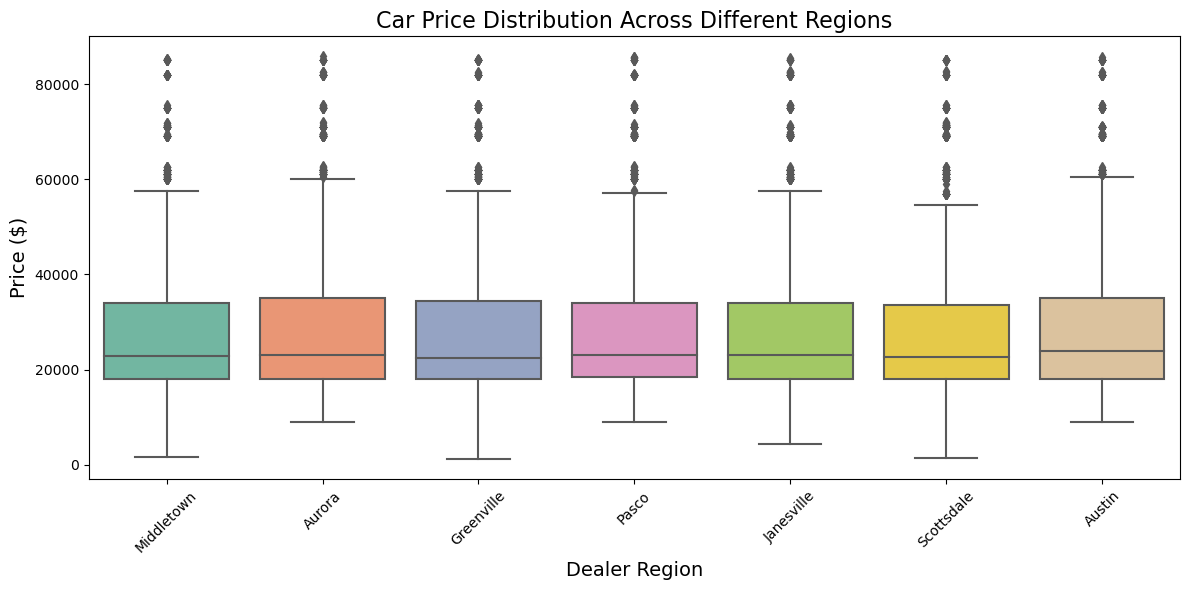

In [90]:
#4.What is the distribution of car prices across different regions?
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the dataset is loaded into a DataFrame 'car_data'
# Boxplot showing the distribution of car prices by Dealer Region
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=car_data, palette='Set2')
plt.title('Car Price Distribution Across Different Regions', fontsize=16)
plt.xlabel('Dealer Region', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.xticks(rotation=45)  # Rotate region names if needed
plt.tight_layout()
plt.show()


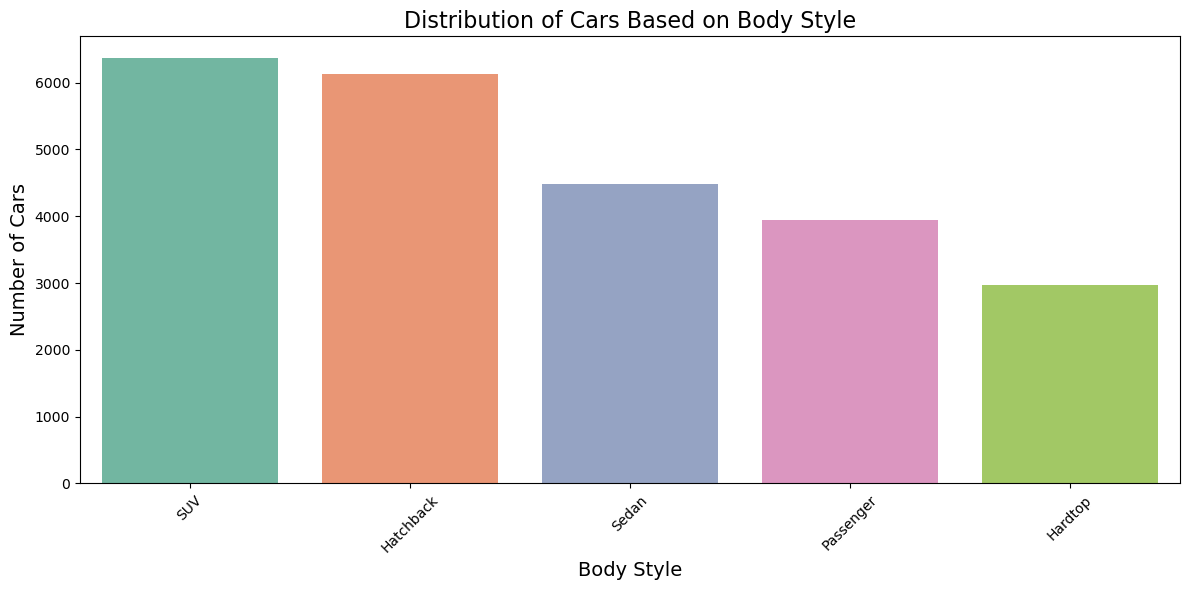

In [92]:
#5.What is the distribution of cars based on body styles ?
# Count the number of cars for each body style
body_style_count = car_data['Body Style'].value_counts().reset_index()
body_style_count.columns = ['Body Style', 'Count']

# Create a bar plot to visualize the distribution of cars based on body style
plt.figure(figsize=(12, 6))
sns.barplot(x='Body Style', y='Count', data=body_style_count, palette='Set2')
plt.title('Distribution of Cars Based on Body Style', fontsize=16)
plt.xlabel('Body Style', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=45)  # Rotate labels if necessary
plt.tight_layout()
plt.show()


   Gender     Price ($)
0  Female  28277.265270
1    Male  28039.429407


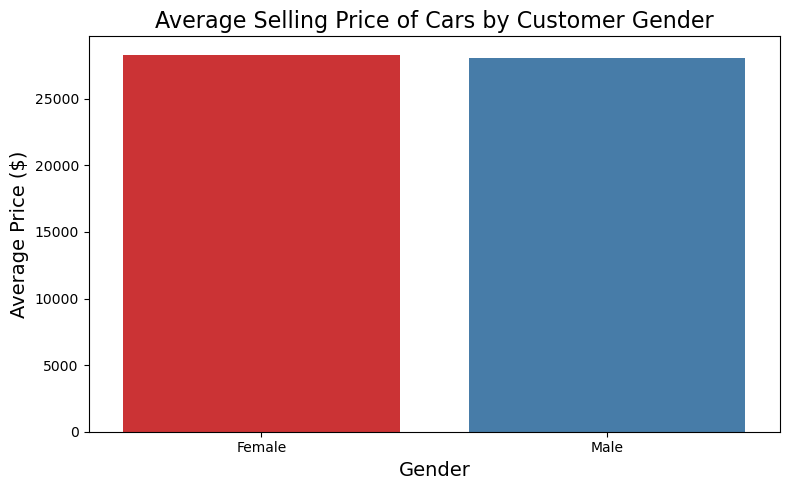

In [94]:
#6.How does the average selling price of cars vary by customer gender and annual income ?
# Group the data by 'Gender' and calculate the average selling price
gender_avg_price = car_data.groupby('Gender')['Price ($)'].mean().reset_index()

# Display the results
print(gender_avg_price)

# Visualize the average price by gender using a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y='Price ($)', data=gender_avg_price, palette='Set1')
plt.title('Average Selling Price of Cars by Customer Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Average Price ($)', fontsize=14)
plt.tight_layout()
plt.show()


  Income_Bin     Price ($)
0      0-30k  27884.297820
1    30k-60k           NaN
2    60k-90k  43000.000000
3   90k-120k  46001.000000
4  120k-150k  17500.000000
5      150k+  28149.089557


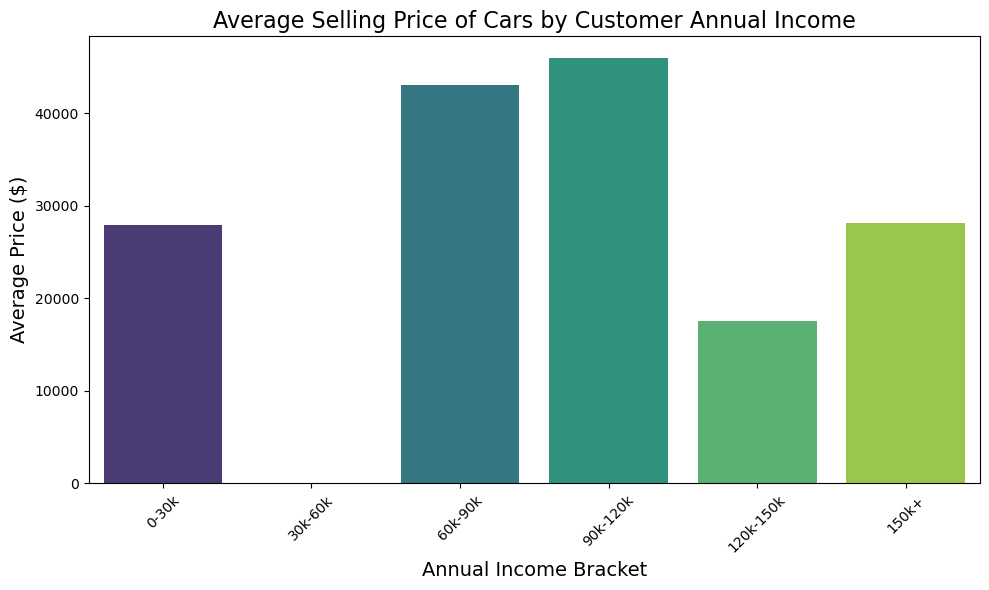

In [96]:
# Define income bins and labels
bins = [0, 30000, 60000, 90000, 120000, 150000, float('inf')]
labels = ['0-30k', '30k-60k', '60k-90k', '90k-120k', '120k-150k', '150k+']

# Create a new column 'Income_Bin' based on Annual Income
car_data['Income_Bin'] = pd.cut(car_data['Annual Income'], bins=bins, labels=labels)

# Group by 'Income_Bin' and calculate the average selling price
income_avg_price = car_data.groupby('Income_Bin')['Price ($)'].mean().reset_index()

# Display the results
print(income_avg_price)

# Visualize the average price by income category using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Income_Bin', y='Price ($)', data=income_avg_price, palette='viridis')
plt.title('Average Selling Price of Cars by Customer Annual Income', fontsize=16)
plt.xlabel('Annual Income Bracket', fontsize=14)
plt.ylabel('Average Price ($)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


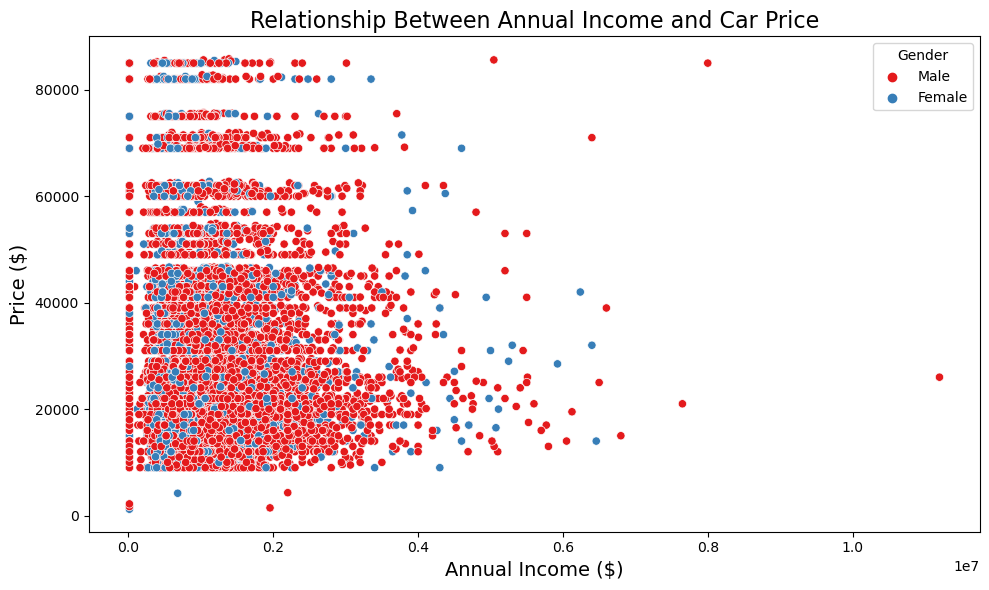

In [98]:
# Scatter plot for Annual Income vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income', y='Price ($)', data=car_data, hue='Gender', palette='Set1')
plt.title('Relationship Between Annual Income and Car Price', fontsize=16)
plt.xlabel('Annual Income ($)', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.tight_layout()
plt.show()


         Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000

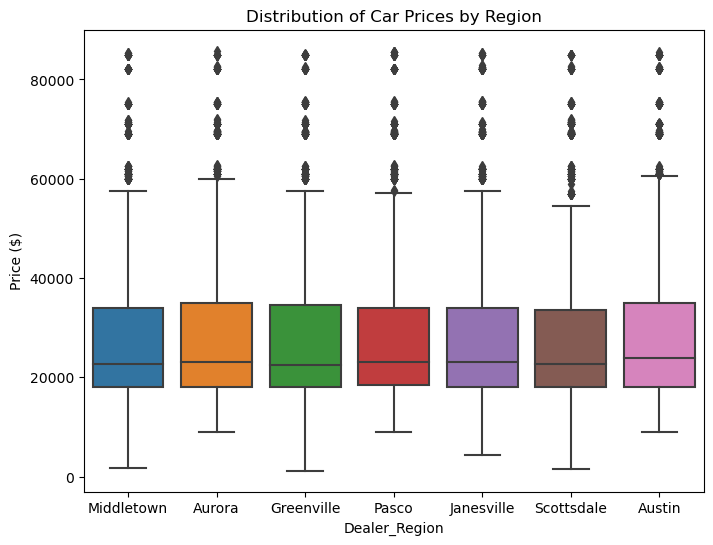

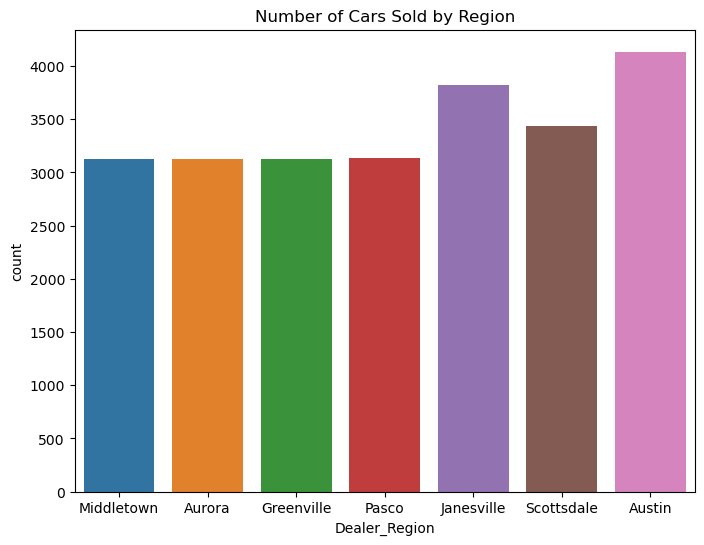

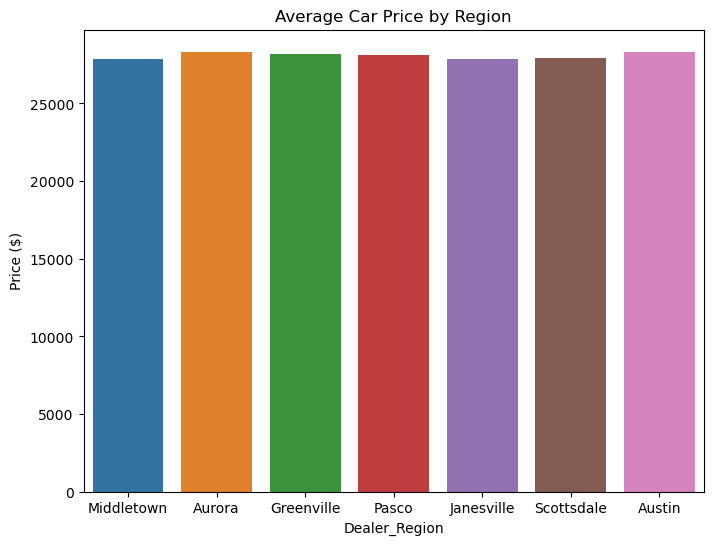

In [121]:
#7.What is the distribution of car prices by region, and how does the number of cars sold vary by region ?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print(car_data.head()) # View the first few rows of the DataFrame

#Check for missing values
print(car_data.isnull().sum())

#Distribution of car prices by region
plt.figure(figsize=(8, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=car_data)
plt.title('Distribution of Car Prices by Region')
plt.show()

#Number of cars sold by region
plt.figure(figsize=(8, 6))
sns.countplot(x='Dealer_Region', data=car_data)
plt.title('Number of Cars Sold by Region')
plt.show()

#Bar chart to compare the average car price by region
plt.figure(figsize=(8, 6))
sns.barplot(x='Dealer_Region', y='Price ($)', data=car_data, errorbar=None)
plt.title('Average Car Price by Region')
plt.show()




['DoubleÂ\xa0Overhead Camshaft' 'Overhead Camshaft']
int64


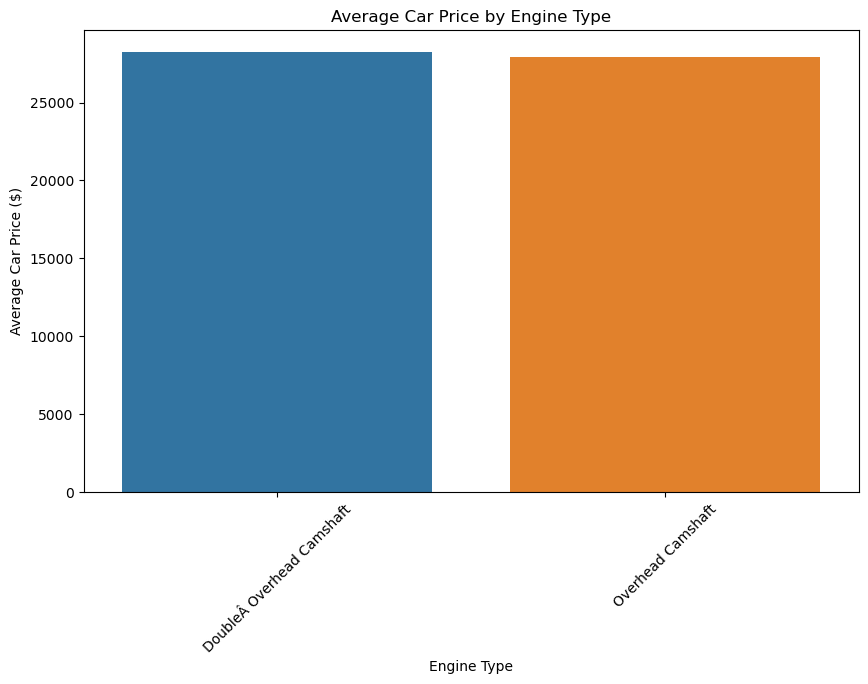

In [123]:
#8. How does the average car price differ between cars with different engine sizes ?

#Check the unique engine types and price column data types
print(car_data['Engine'].unique())  # Check unique engine types
print(car_data['Price ($)'].dtype)  # Check if Price column is numeric

#Calculate the average price for each engine type
avg_price_by_engine = car_data.groupby('Engine')['Price ($)'].mean().reset_index()

#Visualize the average price by engine type using a barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_by_engine, x='Engine', y='Price ($)')
plt.title('Average Car Price by Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Average Car Price ($)')
plt.xticks(rotation=45)
plt.show()


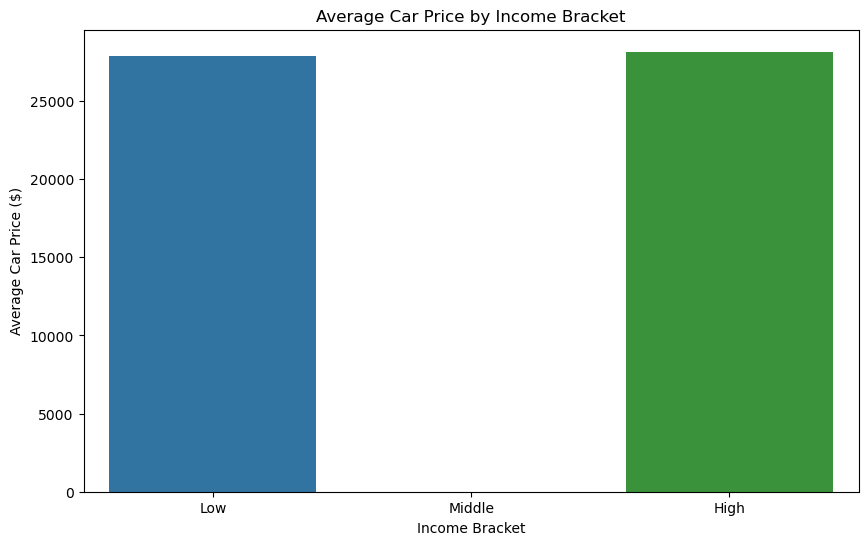

In [125]:
#9.How do car prices vary based on the customer’s annual income bracket?

#  Define income brackets
income_bins = [0, 30000, 70000, float('inf')]  # Brackets for Low, Middle, High income
income_labels = ['Low', 'Middle', 'High']  # Labels for each bracket

#  Create a new column 'Income Bracket' based on the 'Annual Income'
car_data['Income Bracket'] = pd.cut(car_data['Annual Income'], bins=income_bins, labels=income_labels)

#  Calculate the average car price for each income bracket
avg_price_by_income = car_data.groupby('Income Bracket')['Price ($)'].mean().reset_index()

#  Visualize the average car price by income bracket using a barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_by_income, x='Income Bracket', y='Price ($)')
plt.title('Average Car Price by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Average Car Price ($)')
plt.show()


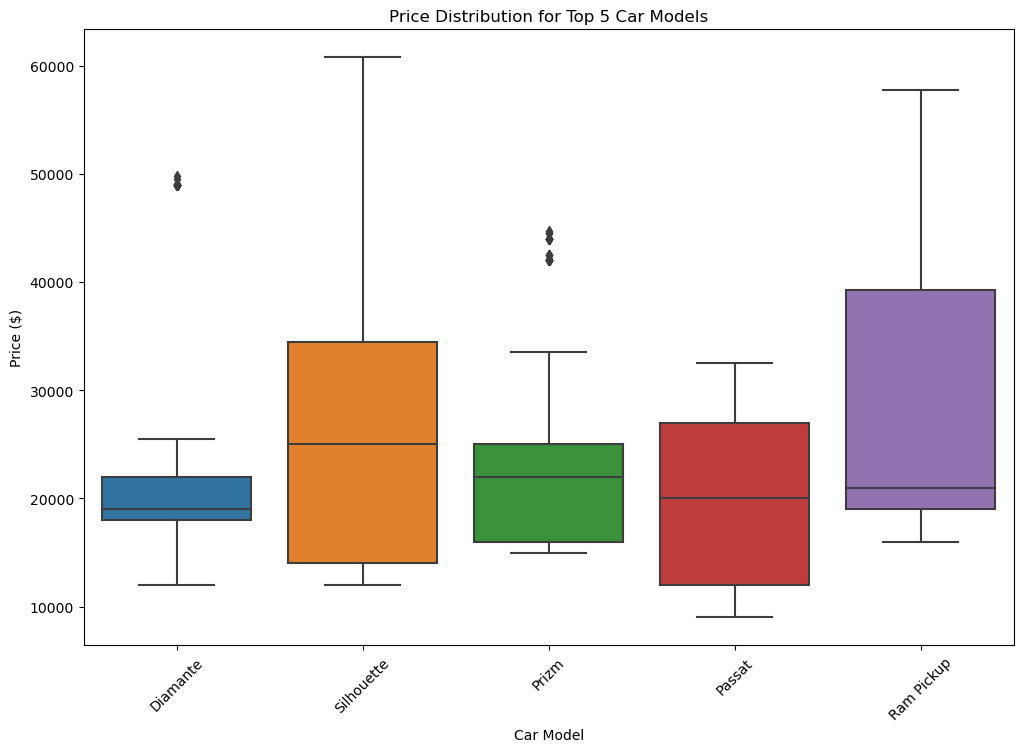

In [127]:
#10.What are the top 5 car models with the highest number of sales, and how does their price distribution look ?

# 1. Find the top 5 car models with the highest number of sales
top_5_models = car_data['Model'].value_counts().head(5).index  # Get the top 5 models

# 2. Filter the data to include only the top 5 models
top_5_data = car_data[car_data['Model'].isin(top_5_models)]

# 3. Visualize the price distribution for each of the top 5 models
plt.figure(figsize=(12, 8))
sns.boxplot(data=top_5_data, x='Model', y='Price ($)', order=top_5_models)
plt.title('Price Distribution for Top 5 Car Models')
plt.xlabel('Car Model')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()


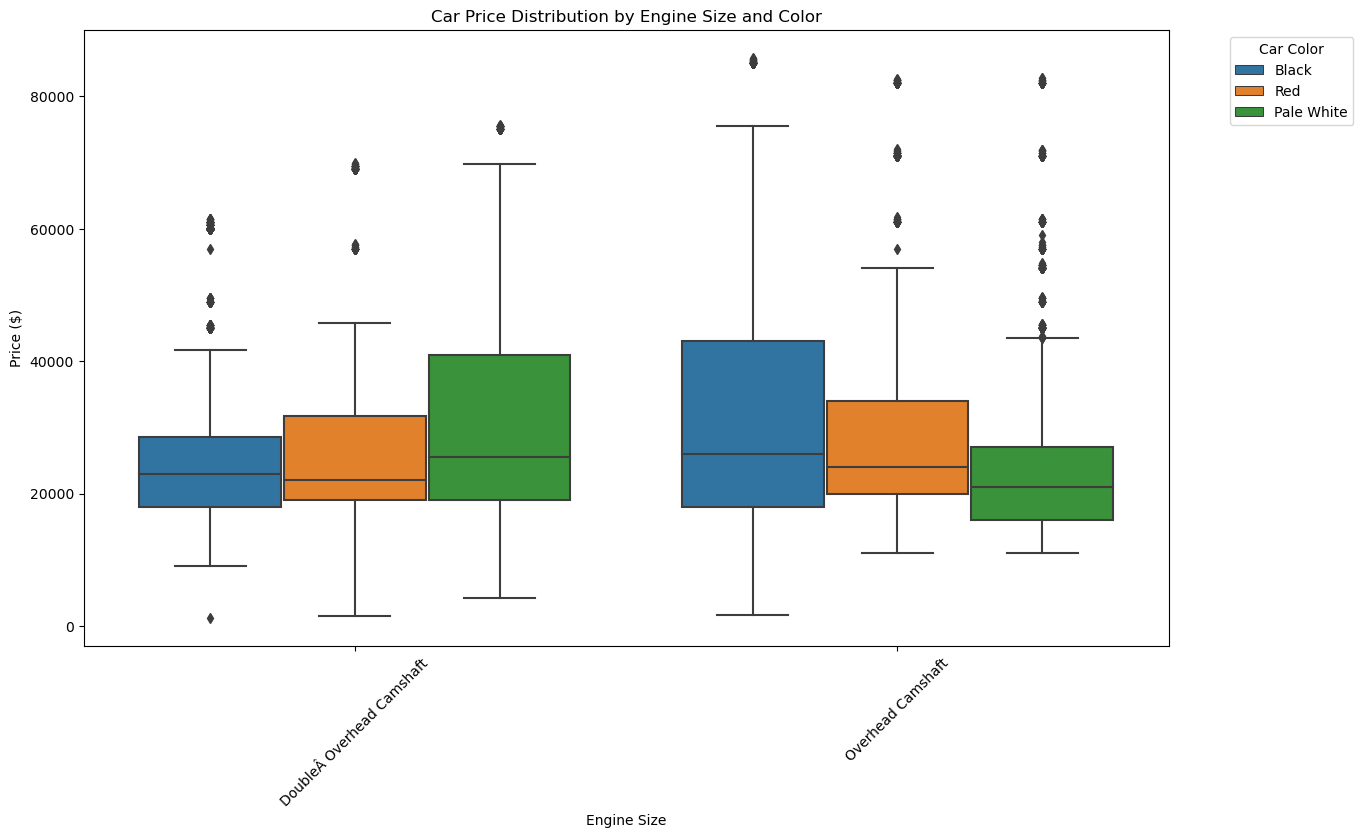

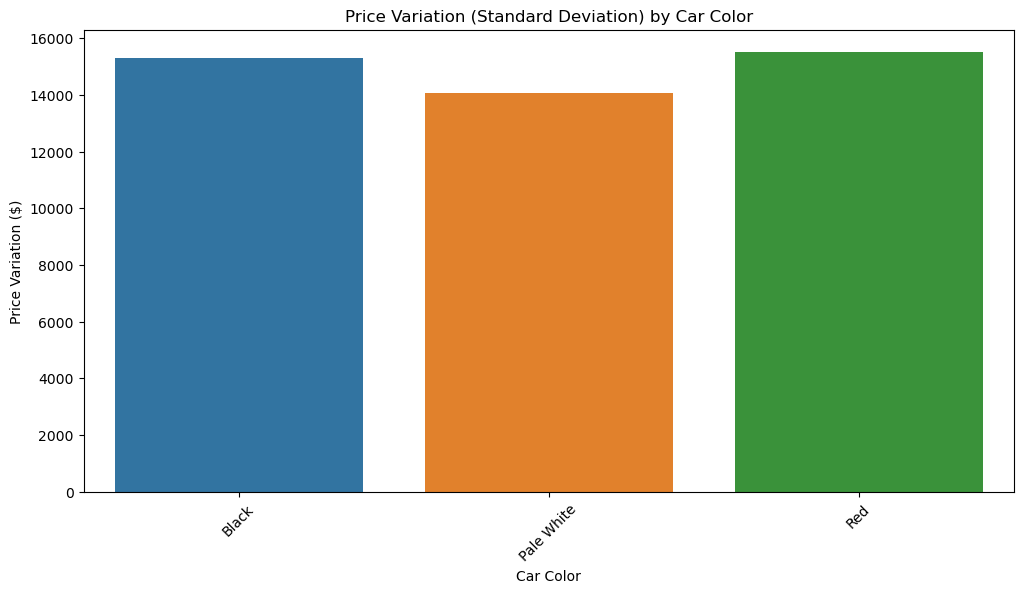

        Color     Price ($)
2         Red  15519.360962
0       Black  15286.065976
1  Pale White  14077.346859


In [129]:
#11.How does car price vary with engine size across different car colors, and which colors have the highest price variation ?

# 1. Visualize the relationship between car price and engine size across different colors
plt.figure(figsize=(14, 8))
sns.boxplot(data=car_data, x='Engine', y='Price ($)', hue='Color')
plt.title('Car Price Distribution by Engine Size and Color')
plt.xlabel('Engine Size')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.legend(title='Car Color', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 2. Calculate price variation (standard deviation) by color
price_variation_by_color = car_data.groupby('Color')['Price ($)'].std().reset_index()

# 3. Visualize price variation for each color
plt.figure(figsize=(12, 6))
sns.barplot(data=price_variation_by_color, x='Color', y='Price ($)')
plt.title('Price Variation (Standard Deviation) by Car Color')
plt.xlabel('Car Color')
plt.ylabel('Price Variation ($)')
plt.xticks(rotation=45)
plt.show()

# 4. Sort colors by price variation and display the top 5
top_price_variation_colors = price_variation_by_color.sort_values(by='Price ($)', ascending=False).head(5)
print(top_price_variation_colors)


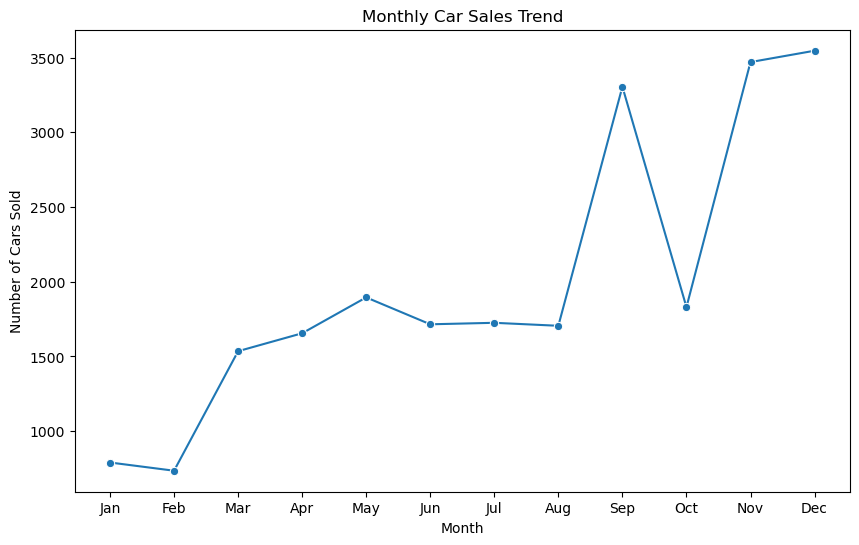

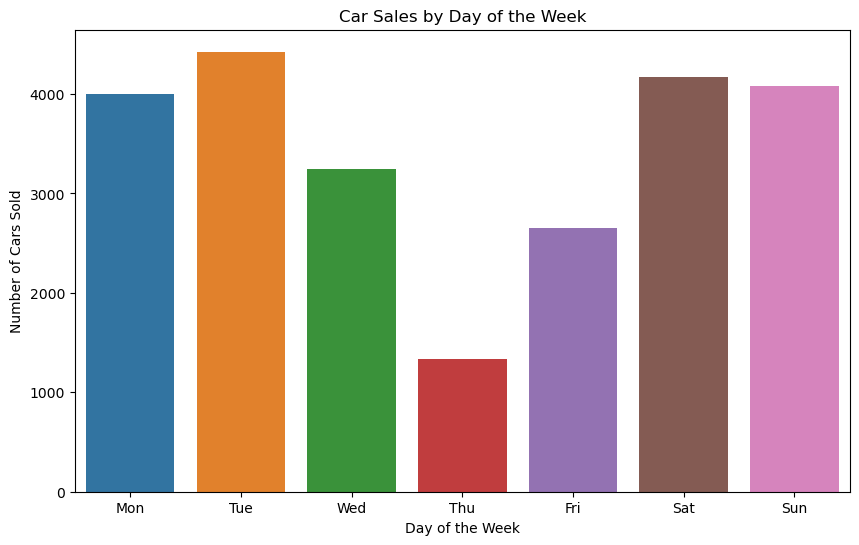

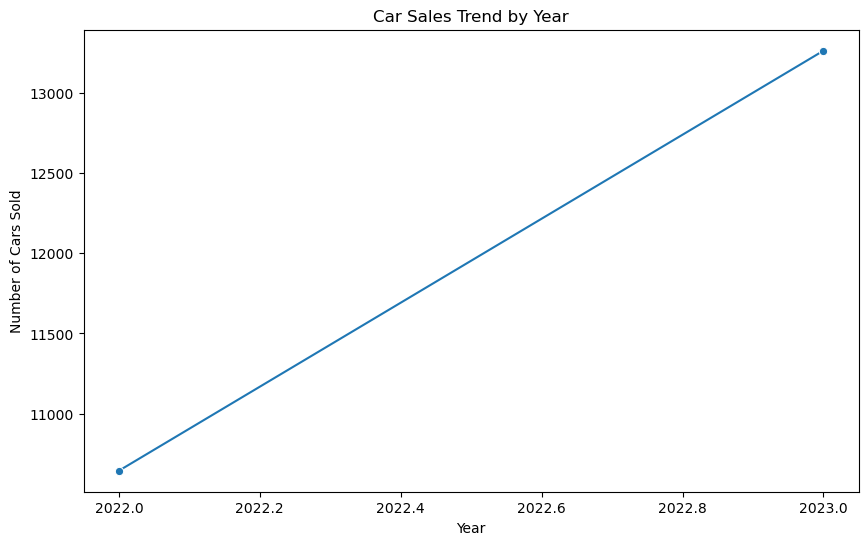

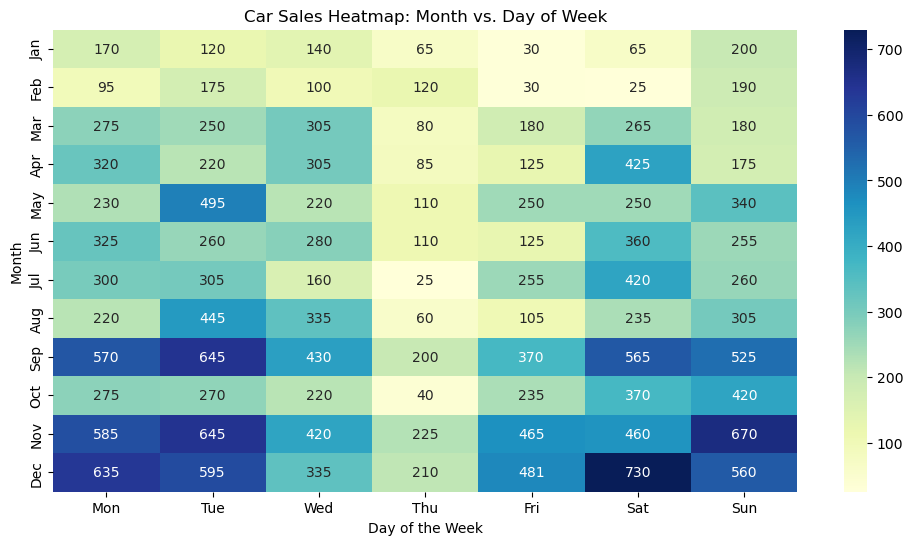

In [131]:
#12. Is there any seasonal trend in car sales based on the date of sale ?

# 1. Convert 'Date' column to datetime format if it's not already
car_data['Date'] = pd.to_datetime(car_data['Date'])

# 2. Extract year, month, and day of the week
car_data['Year'] = car_data['Date'].dt.year
car_data['Month'] = car_data['Date'].dt.month
car_data['Day_of_Week'] = car_data['Date'].dt.dayofweek  # Monday=0, Sunday=6

# 3. Analyze trends by month
monthly_sales = car_data.groupby('Month').size()

# 4. Visualize the monthly sales trend
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title('Monthly Car Sales Trend')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(monthly_sales.index, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# 5. Analyze trends by day of the week
weekday_sales = car_data.groupby('Day_of_Week').size()

# 6. Visualize the weekday sales trend
plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values)
plt.title('Car Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Cars Sold')
plt.xticks(weekday_sales.index, labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

# 7. Analyze yearly trends to see if there's a long-term trend in car sales
yearly_sales = car_data.groupby('Year').size()

# 8. Visualize the yearly sales trend
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values, marker='o')
plt.title('Car Sales Trend by Year')
plt.xlabel('Year')
plt.ylabel('Number of Cars Sold')
plt.show()

# 9. Optional: Heatmap to visualize car sales by month and day of the week
sales_heatmap = car_data.groupby(['Month', 'Day_of_Week']).size().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(sales_heatmap, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], yticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Car Sales Heatmap: Month vs. Day of Week')
plt.xlabel('Day of the Week')
plt.ylabel('Month')
plt.show()


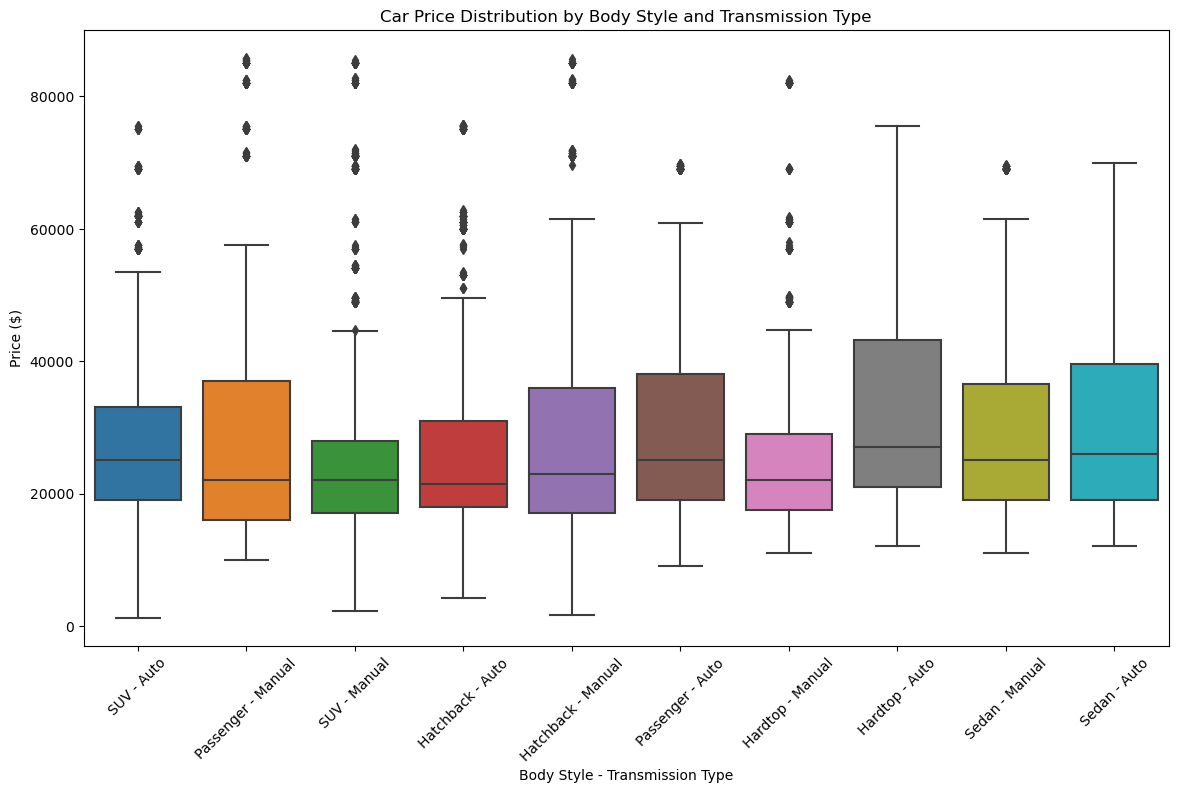

    Body_Transmission   count          mean           std      min      25%  \
0      Hardtop - Auto  1408.0  31520.188210  13687.756740  12000.0  21001.0   
1    Hardtop - Manual  1563.0  27016.943698  14072.501848  11000.0  17575.5   
2    Hatchback - Auto  3458.0  25910.544824  13144.014337   4200.0  18001.0   
3  Hatchback - Manual  2670.0  28702.550562  16284.049616   1700.0  17000.0   
4    Passenger - Auto  2020.0  28915.835149  13946.481932   9000.0  19000.0   
5  Passenger - Manual  1925.0  28969.521039  18523.684163  10000.0  16001.0   
6          SUV - Auto  3086.0  27501.404407  13299.927913   1200.0  19000.0   
7        SUV - Manual  3288.0  26079.019161  14621.526541   2200.0  17000.0   
8        Sedan - Auto  2599.0  29955.294344  14310.910860  12000.0  19000.0   
9      Sedan - Manual  1889.0  29664.271572  15440.056434  11000.0  19001.0   

       50%      75%      max  
0  27000.0  43125.0  75501.0  
1  22001.0  29000.0  82500.0  
2  21500.0  31000.0  75700.0  
3  230

In [133]:
#13. How does the car price distribution change when considering different combinations of body style and transmission type ?

# 1. Create a combination of Body Style and Transmission Type
car_data['Body_Transmission'] = car_data['Body Style'] + ' - ' + car_data['Transmission']

# 2. Visualize the price distribution by body style and transmission type using a boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(data=car_data, x='Body_Transmission', y='Price ($)')
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style - Transmission Type')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

# 3. (Optional) Calculate summary statistics for each combination
price_stats = car_data.groupby('Body_Transmission')['Price ($)'].describe().reset_index()

# Displaying summary statistics for each combination
print(price_stats)


               Price ($)  Annual Income
Price ($)       1.000000       0.012065
Annual Income   0.012065       1.000000


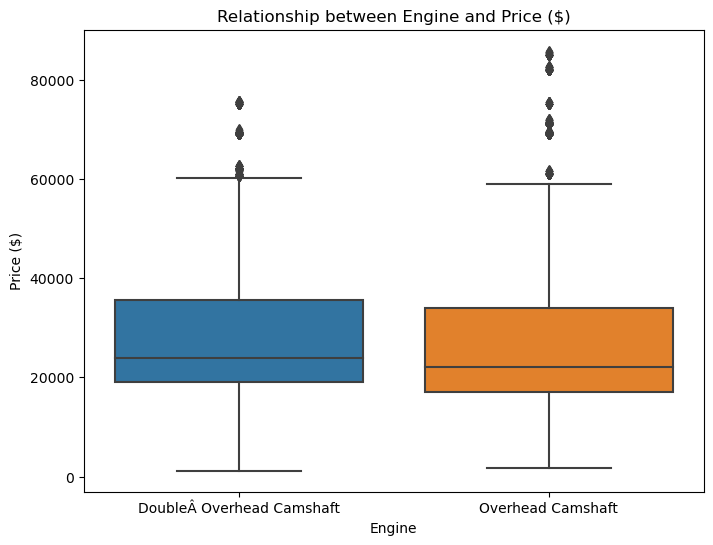

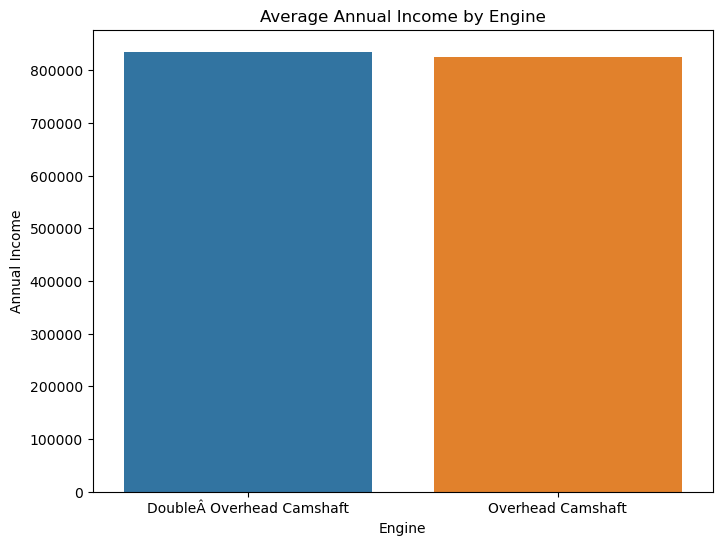

In [141]:
#Calculate correlation coefficients
correlation_matrix = car_data[['Price ($)', 'Annual Income']].corr()

#Print the correlation matrix
print(correlation_matrix)

#Create a box plot to display the relationship between Engine and Price ($)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Engine', y='Price ($)', data=car_data)
plt.title('Relationship between Engine and Price ($)')
plt.show()

#Create a bar chart to display the average Annual Income by Engine
plt.figure(figsize=(8, 6))
sns.barplot(x='Engine', y='Annual Income', data=car_data, errorbar=None)
plt.title('Average Annual Income by Engine')
plt.show()



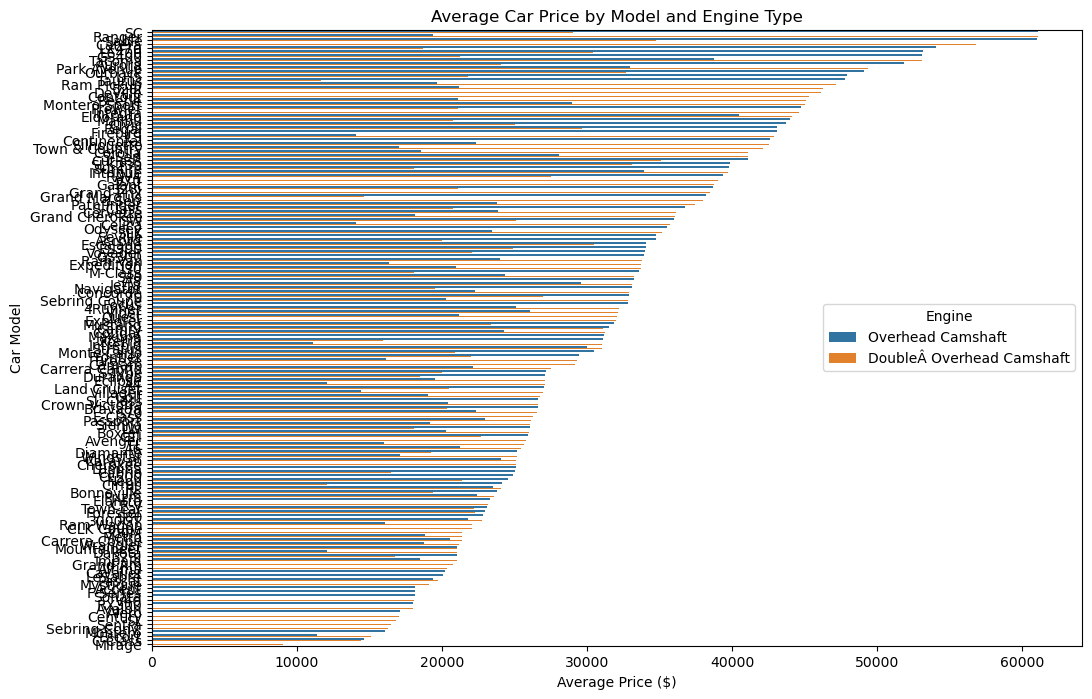

In [143]:
#15.How does the average car price vary across different car models and engine types?

# 1. Group by 'Model' and 'Engine', and calculate the average price for each group
avg_price_by_model_engine = car_data.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()

# 2. Sort the results by average price for better visualization
avg_price_by_model_engine_sorted = avg_price_by_model_engine.sort_values('Price ($)', ascending=False)

# 3. Visualize the average price using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_price_by_model_engine_sorted, x='Price ($)', y='Model', hue='Engine', dodge=True)
plt.title('Average Car Price by Model and Engine Type')
plt.xlabel('Average Price ($)')
plt.ylabel('Car Model')
plt.show()


EDA-3 Amazon Sales

In [148]:
 amazon_data = pd.read_csv('amazon.csv')

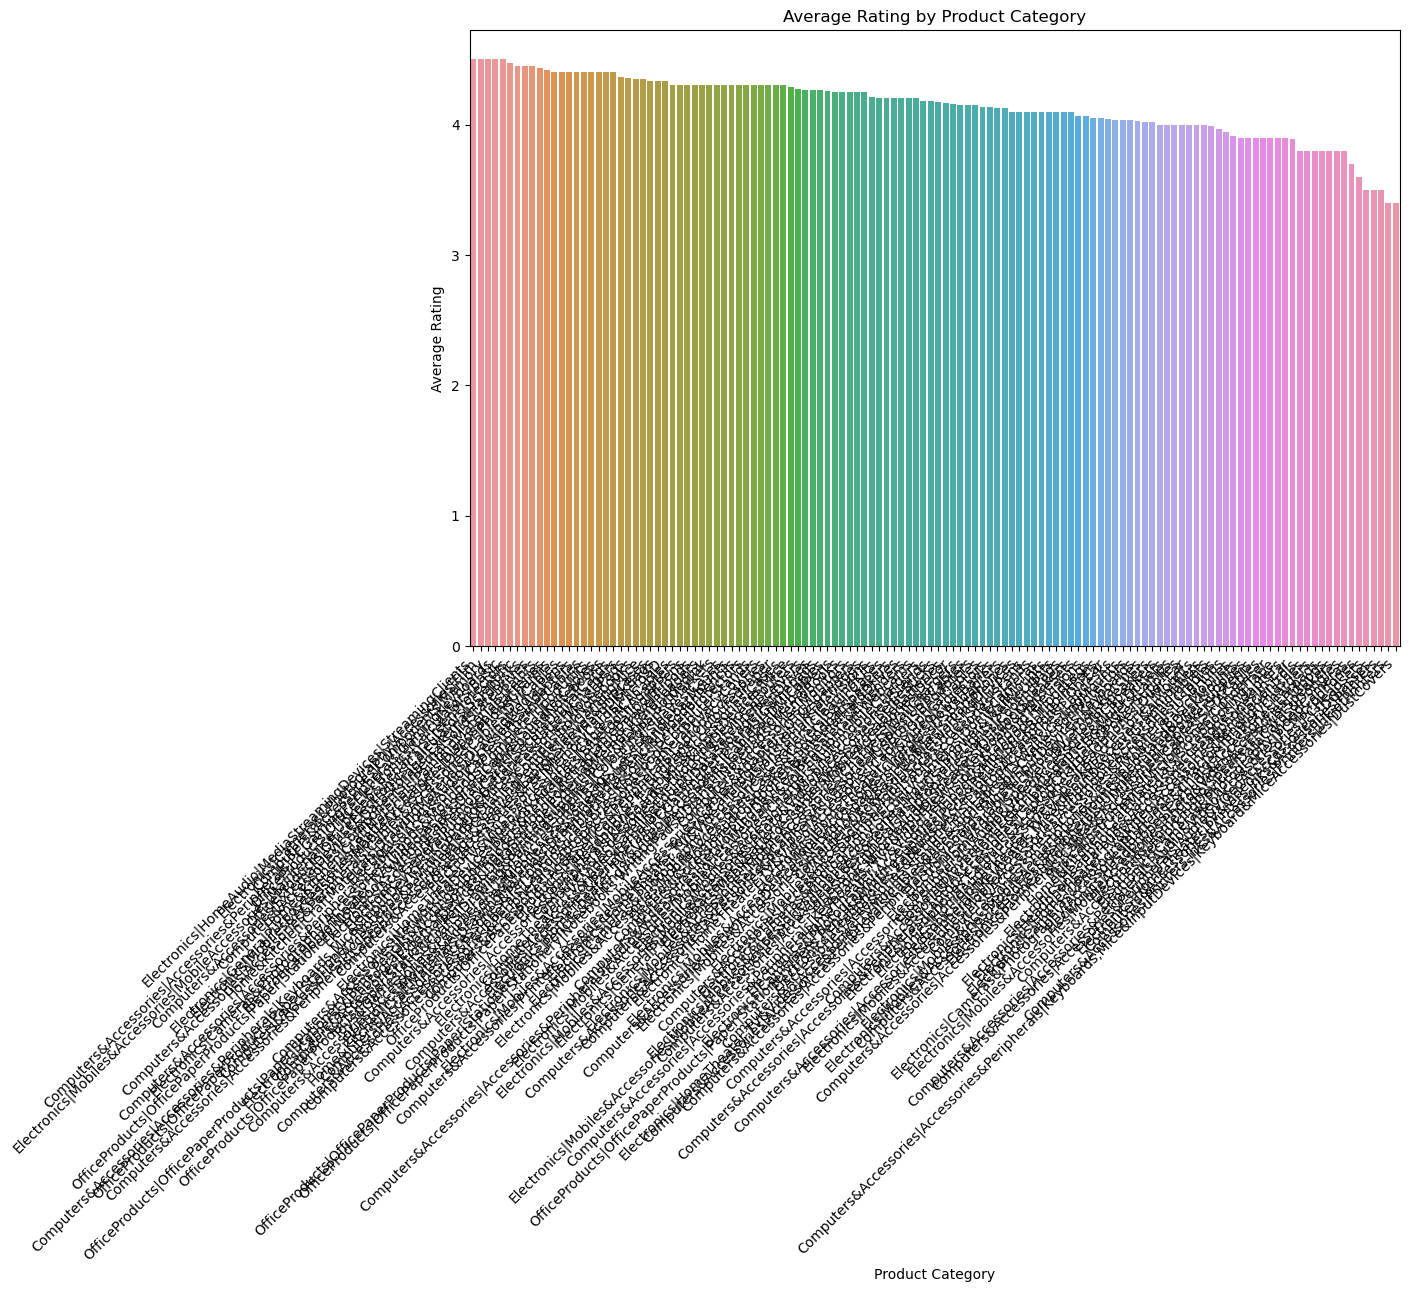

                                              category  rating
71   Electronics|HomeAudio|MediaStreamingDevices|St...     4.5
53    Electronics|Cameras&Photography|Accessories|Film     4.5
35             Computers&Accessories|Components|Memory     4.5
25   Computers&Accessories|Accessories&Peripherals|...     4.5
115  OfficeProducts|OfficeElectronics|Calculators|B...     4.5
..                                                 ...     ...
1    Computers&Accessories|Accessories&Peripherals|...     3.5
78   Electronics|HomeTheater,TV&Video|Accessories|3...     3.5
47   Computers&Accessories|Printers,Inks&Accessorie...     3.5
48   Computers&Accessories|Printers,Inks&Accessorie...     3.4
12   Computers&Accessories|Accessories&Peripherals|...     3.4

[126 rows x 2 columns]


In [152]:
#1.What is the average rating for each product category ?

# 1. Group by 'category' and calculate the average 'rating' for each category
avg_rating_by_category = amazon_data.groupby('category')['rating'].mean().reset_index()

# 2. Sort the results for better visualization (optional)
avg_rating_by_category_sorted = avg_rating_by_category.sort_values('rating', ascending=False)

# 3. Plotting the average rating by category
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_rating_by_category_sorted, x='category', y='rating')
plt.title('Average Rating by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha="right")
plt.show()

# Optionally, print the table of average ratings by category
print(avg_rating_by_category_sorted)


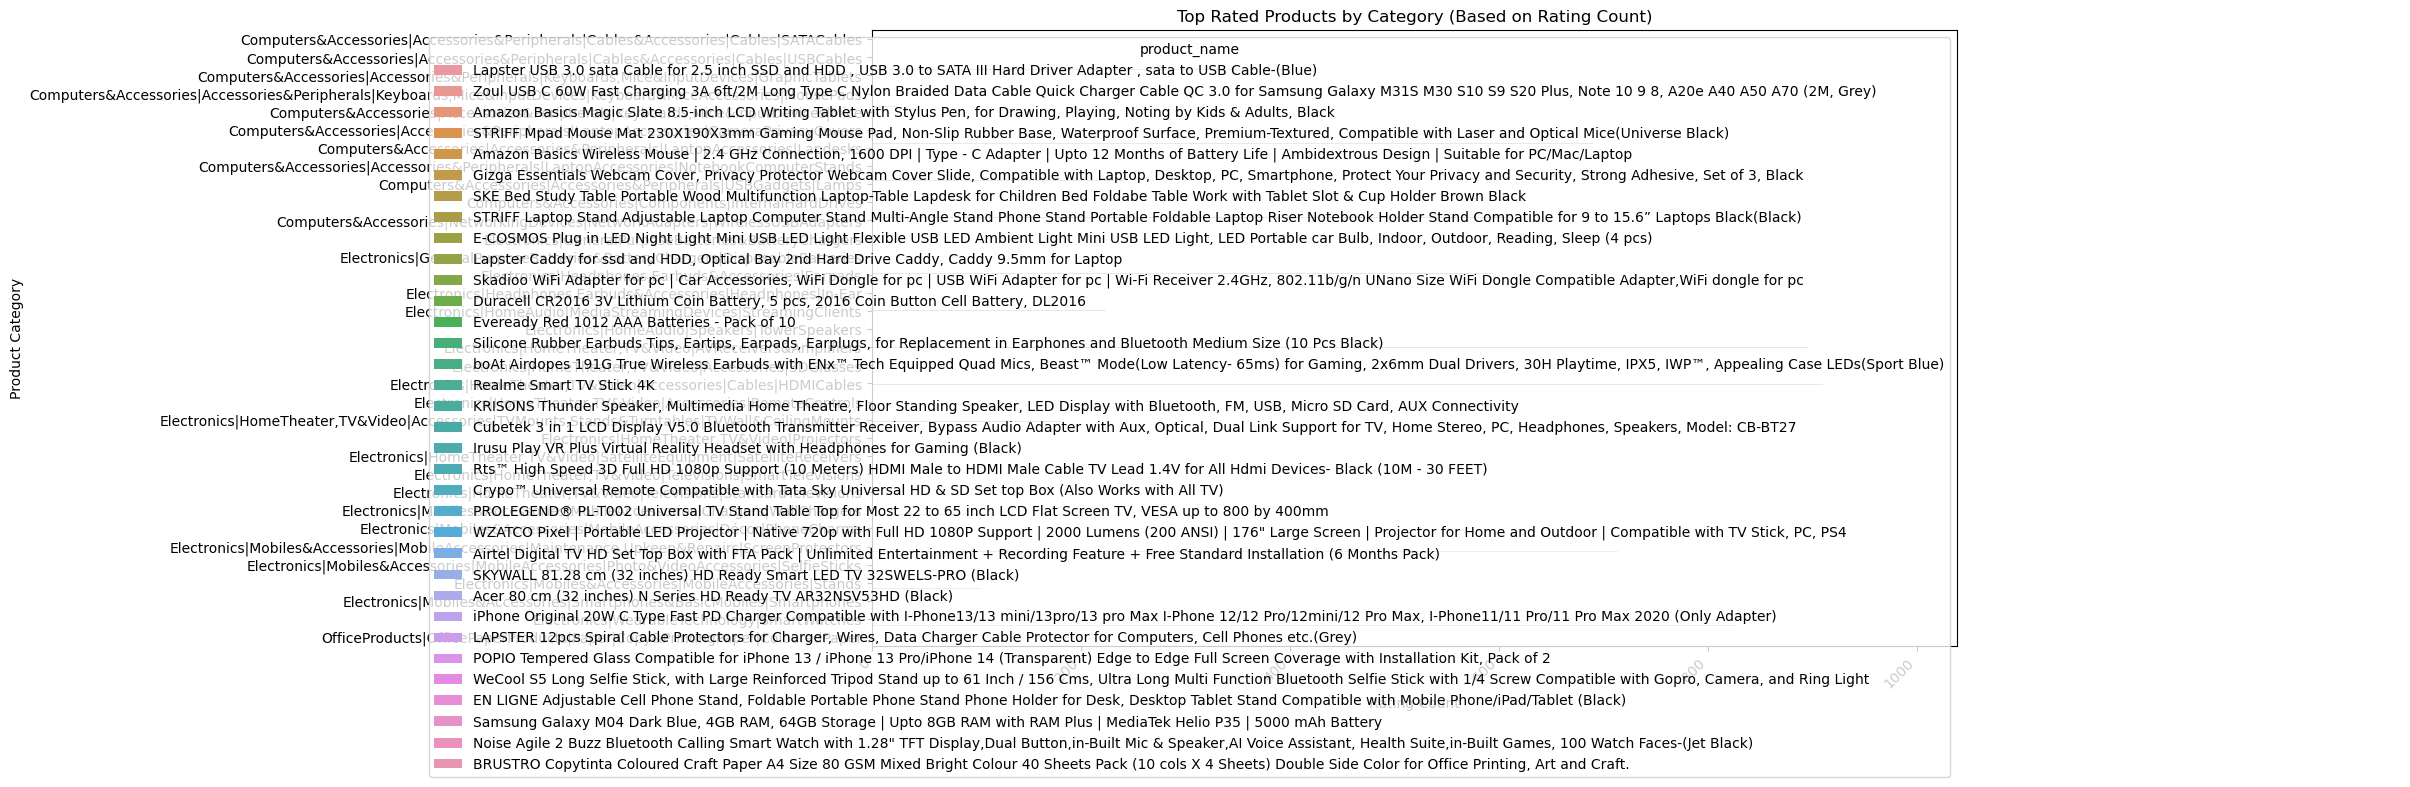

                                              category  \
900  Computers&Accessories|Accessories&Peripherals|...   
32   Computers&Accessories|Accessories&Peripherals|...   
743  Computers&Accessories|Accessories&Peripherals|...   
653  Computers&Accessories|Accessories&Peripherals|...   
775  Computers&Accessories|Accessories&Peripherals|...   
798  Computers&Accessories|Accessories&Peripherals|...   
592  Computers&Accessories|Accessories&Peripherals|...   
758  Computers&Accessories|Accessories&Peripherals|...   
783  Computers&Accessories|Accessories&Peripherals|...   
863  Computers&Accessories|Components|InternalHardD...   
175  Computers&Accessories|NetworkingDevices|Networ...   
913  Electronics|GeneralPurposeBatteries&BatteryCha...   
750  Electronics|GeneralPurposeBatteries&BatteryCha...   
920  Electronics|Headphones,Earbuds&Accessories|Ear...   
859  Electronics|Headphones,Earbuds&Accessories|Hea...   
264  Electronics|HomeAudio|MediaStreamingDevices|St...   
269       Elec

In [156]:
#2.What are the top rating_count products by category ?

# 1. Ensure that 'rating_count' is numeric, and handle any missing or invalid values (e.g., NaN)
amazon_data['rating_count'] = pd.to_numeric(amazon_data['rating_count'], errors='coerce')

# 2. Drop rows where 'rating_count' is NaN (optional)
amazon_data = amazon_data.dropna(subset=['rating_count'])

# 3. Find the product with the highest rating_count in each category
top_rated_products_by_category = amazon_data.loc[
    amazon_data.groupby('category')['rating_count'].idxmax()
]

# 4. Sort the results by category for better readability (optional)
top_rated_products_by_category_sorted = top_rated_products_by_category.sort_values('category')

# 5. Plotting the top-rated products by category based on rating_count
plt.figure(figsize=(14, 8))
sns.barplot(data=top_rated_products_by_category_sorted, x='rating_count', y='category', hue='product_name')
plt.title('Top Rated Products by Category (Based on Rating Count)')
plt.xlabel('Rating Count')
plt.ylabel('Product Category')
plt.xticks(rotation=45, ha="right")
plt.show()

# 6. Print the top-rated products table (optional)
print(top_rated_products_by_category_sorted[['category', 'product_name', 'rating_count']])



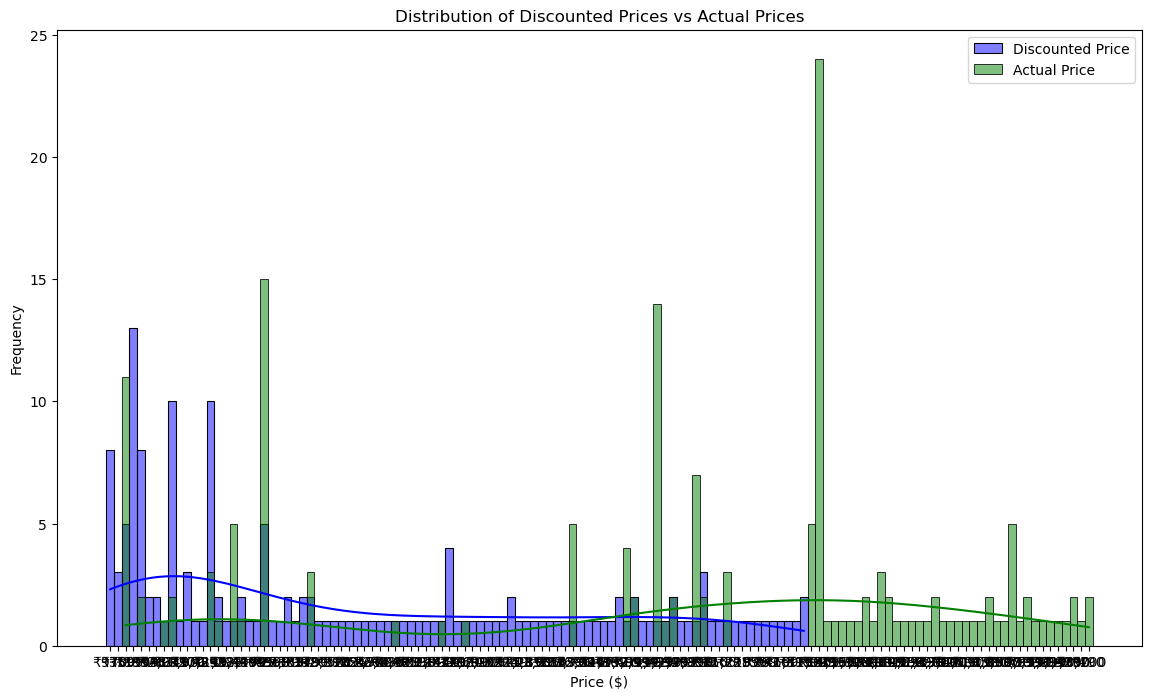

In [158]:
#3.What is the distribution of discounted prices vs. actual prices ?

# 1. Plot histogram of discounted price vs actual price
plt.figure(figsize=(14, 8))

# Plot discounted price distribution
sns.histplot(amazon_data['discounted_price'], kde=True, color='blue', label='Discounted Price', bins=30)

# Plot actual price distribution
sns.histplot(amazon_data['actual_price'], kde=True, color='green', label='Actual Price', bins=30)

plt.title('Distribution of Discounted Prices vs Actual Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


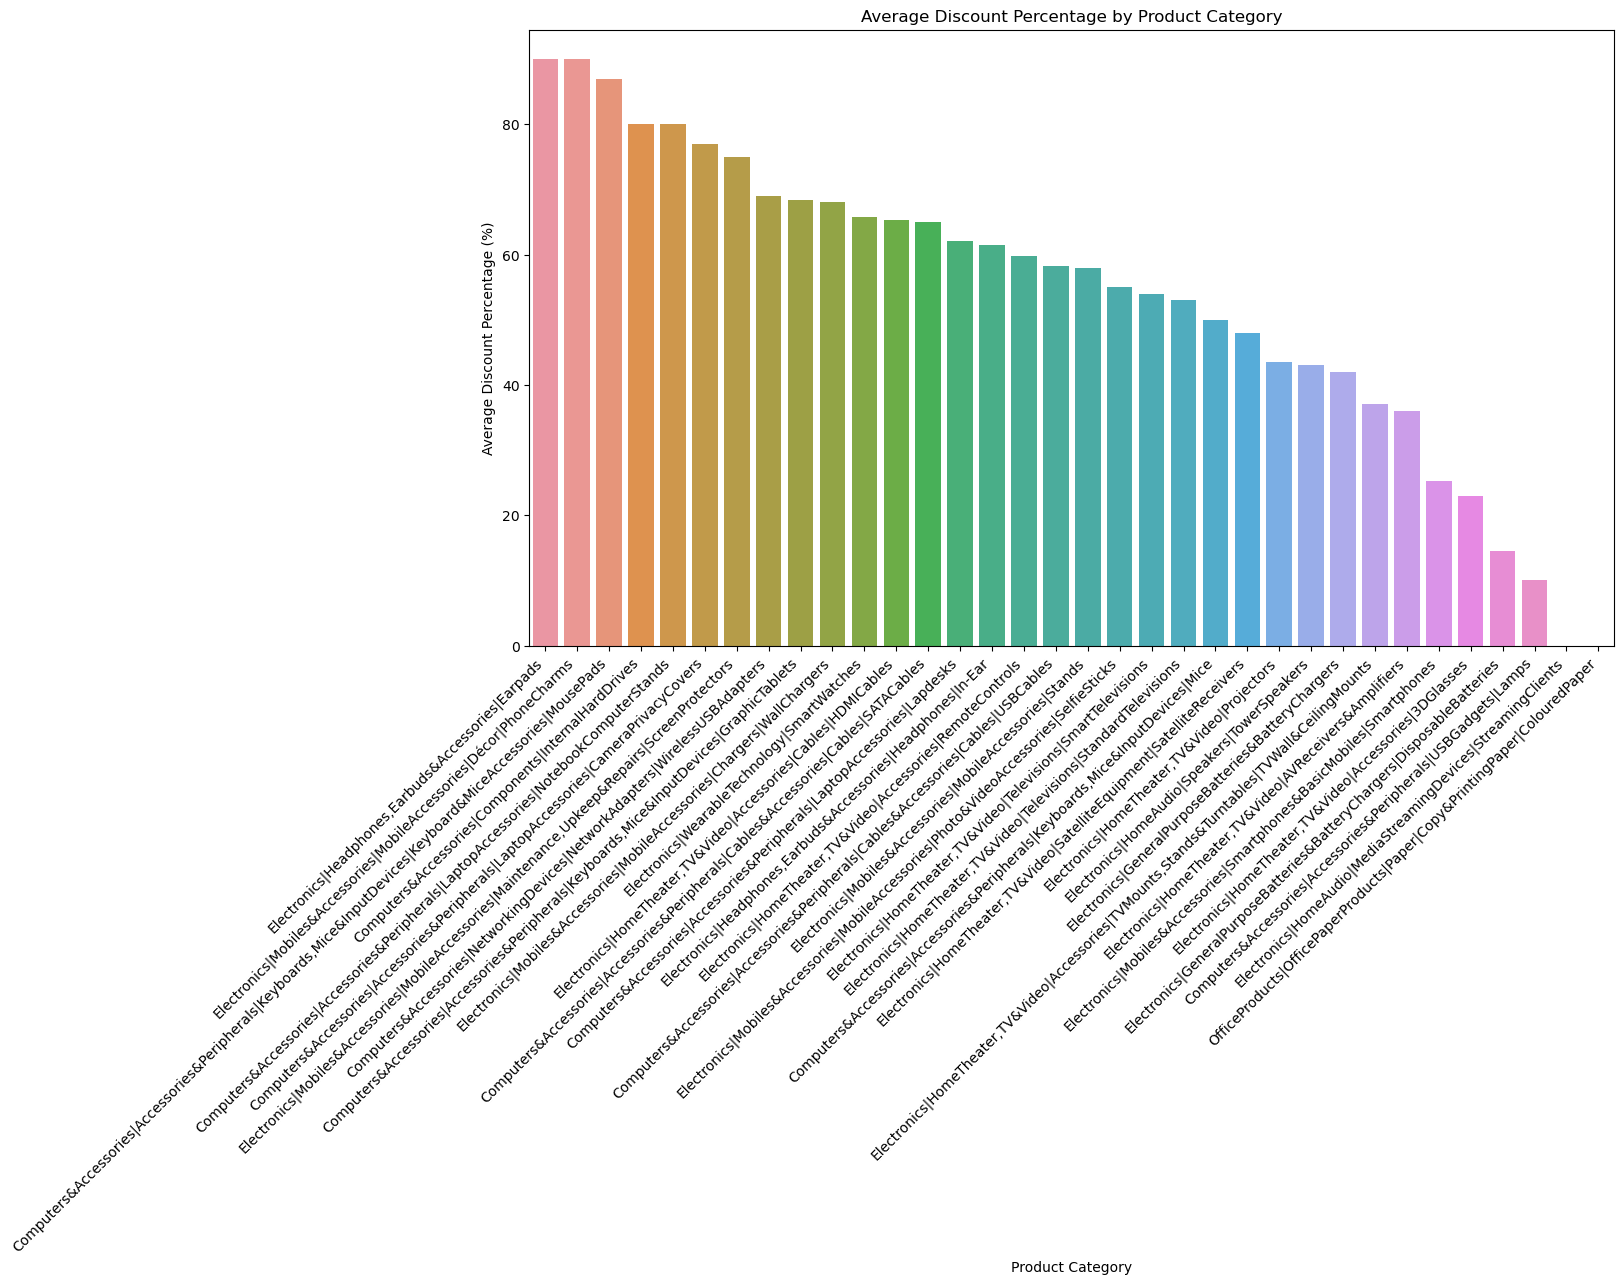

                                             category  discount_percentage
13  Electronics|Headphones,Earbuds&Accessories|Ear...            90.000000
27  Electronics|Mobiles&Accessories|MobileAccessor...            90.000000
3   Computers&Accessories|Accessories&Peripherals|...            87.000000
9   Computers&Accessories|Components|InternalHardD...            80.000000
7   Computers&Accessories|Accessories&Peripherals|...            80.000000
5   Computers&Accessories|Accessories&Peripherals|...            77.000000
28  Electronics|Mobiles&Accessories|MobileAccessor...            75.000000
10  Computers&Accessories|NetworkingDevices|Networ...            69.000000
2   Computers&Accessories|Accessories&Peripherals|...            68.333333
26  Electronics|Mobiles&Accessories|MobileAccessor...            68.000000
32        Electronics|WearableTechnology|SmartWatches            65.769231
19  Electronics|HomeTheater,TV&Video|Accessories|C...            65.333333
0   Computers&Accessories

In [167]:
#4.' How does the average discount percentage vary across categories ?


# Step 1: Remove the '%' sign and convert 'discount_percentage' to numeric
amazon_data['discount_percentage'] = amazon_data['discount_percentage'].replace('%', '', regex=True).astype(float)

# If necessary, divide by 100 to get percentage as a decimal (optional based on the context)
# amazon_data['discount_percentage'] = amazon_data['discount_percentage'] / 100

# Step 2: Group by 'category' and calculate the average discount percentage for each category
avg_discount_by_category = amazon_data.groupby('category')['discount_percentage'].mean().reset_index()

# Step 3: Sort the results for better readability (optional)
avg_discount_by_category_sorted = avg_discount_by_category.sort_values('discount_percentage', ascending=False)

# Step 4: Plotting the average discount percentage by category
plt.figure(figsize=(14, 8))
sns.barplot(data=avg_discount_by_category_sorted, x='category', y='discount_percentage')
plt.title('Average Discount Percentage by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Discount Percentage (%)')
plt.xticks(rotation=45, ha="right")
plt.show()

# Optionally, print the table of average discount percentages by category
print(avg_discount_by_category_sorted)


In [169]:
#5.' What are the most popular product names ?

# Group by product_name and sum the rating_count for each product
popular_products_reviews = amazon_data.groupby('product_name')['rating_count'].sum().reset_index()

# Sort the products by the total rating_count in descending order
popular_products_reviews_sorted = popular_products_reviews.sort_values('rating_count', ascending=False)

# Get the top 10 most popular products based on rating_count
top_10_popular_products = popular_products_reviews_sorted.head(10)

# Print the top 10 most popular products based on reviews
print(top_10_popular_products)


                                          product_name  rating_count
48   Duracell USB Lightning Apple Certified (Mfi) B...        2445.0
143  Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...        1948.0
138  Wecool Unbreakable 3 in 1 Charging Cable with ...        1312.0
22   Ambrane 2 in 1 Type-C & Micro USB Cable with 6...        1204.0
118  Sounce 65W OnePlus Dash Warp Charge Cable, 6.5...        1151.0
56        Eveready Red 1012 AAA Batteries - Pack of 10         989.0
144  Zoul USB Type C Fast Charging 3A Nylon Braided...         974.0
39   Crypo™ Universal Remote Compatible with Tata S...         928.0
45   Duracell Type C To Type C 5A (100W) Braided Sy...         924.0
24   Ambrane Fast 100W Output Cable with Type-C to ...         919.0


In [171]:
# Count the occurrences of each product_name in the dataset
popular_products_occurrence = amazon_data['product_name'].value_counts().reset_index()

# Rename the columns for clarity
popular_products_occurrence.columns = ['product_name', 'occurrence_count']

# Sort by occurrence count in descending order
popular_products_occurrence_sorted = popular_products_occurrence.sort_values('occurrence_count', ascending=False)

# Get the top 10 most popular products by occurrence
top_10_popular_products_occurrence = popular_products_occurrence_sorted.head(10)

# Print the top 10 most popular products by frequency of occurrence
print(top_10_popular_products_occurrence)





                                        product_name  occurrence_count
0  Duracell USB Lightning Apple Certified (Mfi) B...                 3
1  Duracell USB C To Lightning Apple Certified (M...                 3
6  Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...                 2
9  Duracell Type C To Type C 5A (100W) Braided Sy...                 2
7  Sounce 65W OnePlus Dash Warp Charge Cable, 6.5...                 2
8  Samsung Original Type C to C Cable - 3.28 Feet...                 2
5  Ambrane 2 in 1 Type-C & Micro USB Cable with 6...                 2
4  Wecool Unbreakable 3 in 1 Charging Cable with ...                 2
3                                   Firestick Remote                 2
2  Ambrane Unbreakable 3A Fast Charging Braided T...                 2


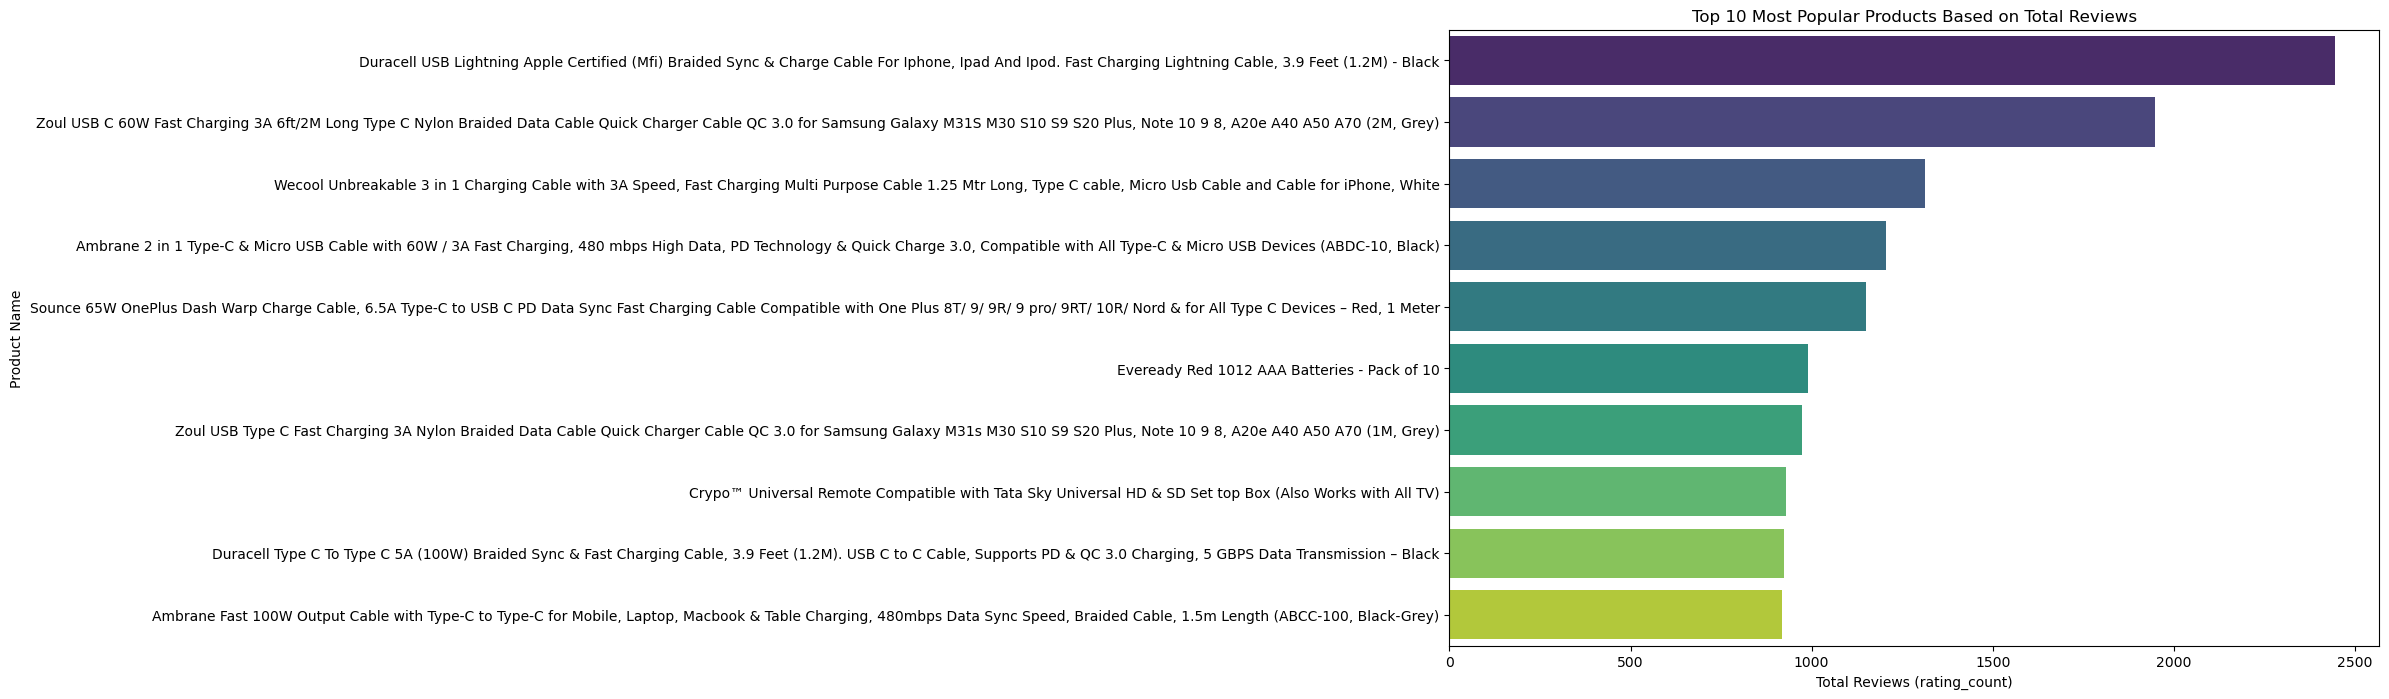

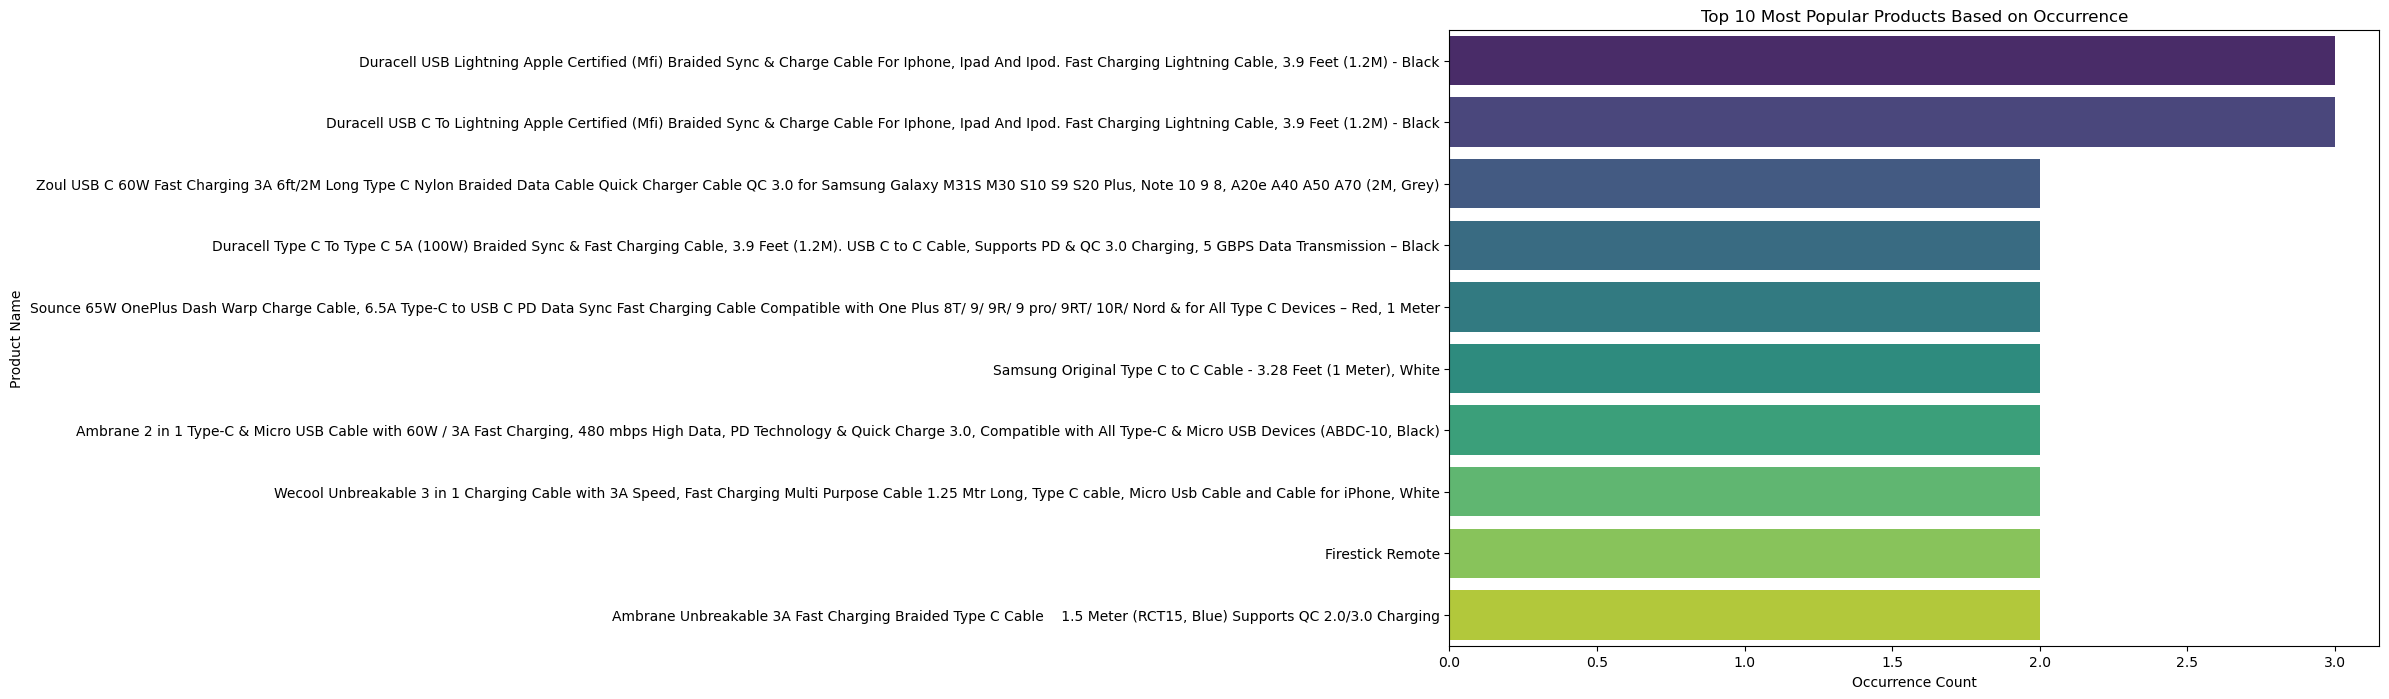

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the top 10 products based on rating_count (Method 1)
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_popular_products, x='rating_count', y='product_name', palette='viridis')
plt.title('Top 10 Most Popular Products Based on Total Reviews')
plt.xlabel('Total Reviews (rating_count)')
plt.ylabel('Product Name')
plt.show()

# Visualize the top 10 products based on occurrence count (Method 2)
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_popular_products_occurrence, x='occurrence_count', y='product_name', palette='viridis')
plt.title('Top 10 Most Popular Products Based on Occurrence')
plt.xlabel('Occurrence Count')
plt.ylabel('Product Name')
plt.show()


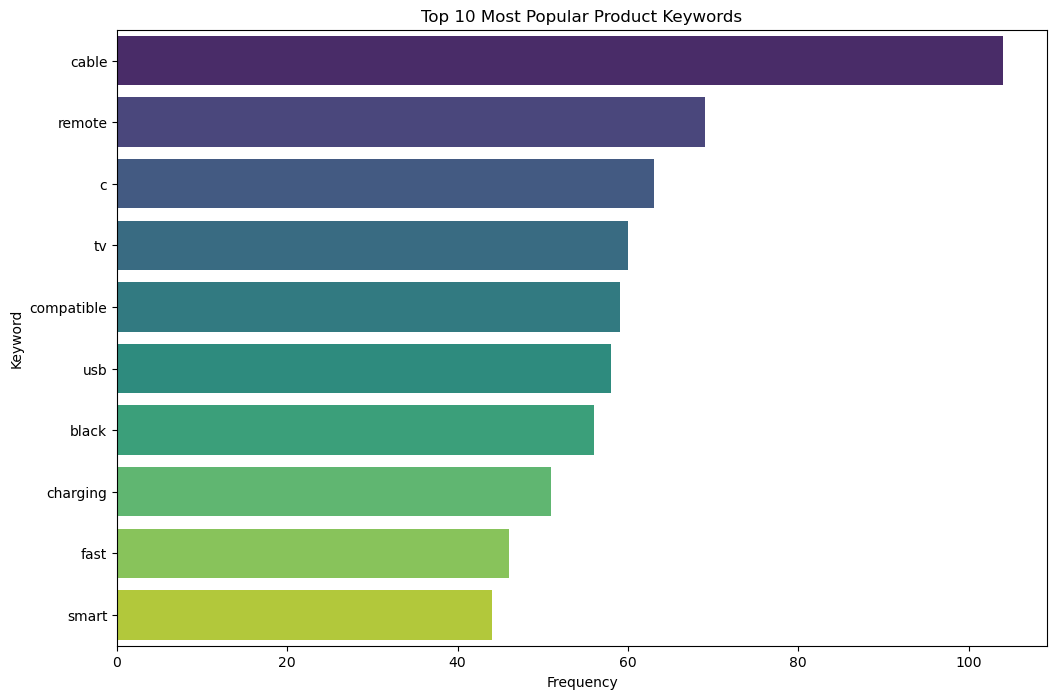

      Keyword  Frequency
0       cable        104
1      remote         69
2           c         63
3          tv         60
4  compatible         59
5         usb         58
6       black         56
7    charging         51
8        fast         46
9       smart         44


In [177]:
#6. What are the most popular product keywords ?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from collections import Counter
import re  # <-- Importing the 're' module for regular expressions

# Step 1: Clean and tokenize product names
def clean_and_tokenize(text):
    # Remove non-alphabetic characters (like numbers, punctuation)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lower case and split into words
    words = text.lower().split()
    # Remove stopwords (common non-informative words)
    filtered_words = [word for word in words if word not in ENGLISH_STOP_WORDS]
    return filtered_words

# Step 2: Tokenize all product names
all_words = []
for product_name in amazon_data['product_name']:
    all_words.extend(clean_and_tokenize(product_name))

# Step 3: Count the frequency of each word
word_counts = Counter(all_words)

# Step 4: Get the 10 most common keywords
most_common_keywords = word_counts.most_common(10)

# Step 5: Create a DataFrame for visualization
keyword_df = pd.DataFrame(most_common_keywords, columns=['Keyword', 'Frequency'])

# Step 6: Plot the most common keywords
plt.figure(figsize=(12, 8))
sns.barplot(data=keyword_df, x='Frequency', y='Keyword', palette='viridis')
plt.title('Top 10 Most Popular Product Keywords')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.show()

# Optionally, print the DataFrame with keyword frequencies
print(keyword_df)


    


In [179]:
#7.What are the most popular product reviews ?

# Step 1: Sort the reviews based on 'rating_count' in descending order
most_rated_reviews = amazon_data[['review_id', 'product_name', 'rating_count', 'review_title', 'review_content']].sort_values('rating_count', ascending=False)

# Step 2: Get the top 10 most rated reviews
top_10_most_rated_reviews = most_rated_reviews.head(10)

# Step 3: Display the top 10 most rated reviews
print(top_10_most_rated_reviews[['product_name', 'review_title', 'rating_count', 'review_content']])


                                          product_name  \
750       Eveready Red 1012 AAA Batteries - Pack of 10   
151  Zoul USB Type C Fast Charging 3A Nylon Braided...   
32   Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...   
823  Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...   
214  Crypo™ Universal Remote Compatible with Tata S...   
147  Ambrane Fast 100W Output Cable with Type-C to ...   
227  Rts™ High Speed 3D Full HD 1080p Support (10 M...   
758  STRIFF Laptop Stand Adjustable Laptop Computer...   
82   SKYWALL 81.28 cm (32 inches) HD Ready Smart LE...   
268  Cubetek 3 in 1 LCD Display V5.0 Bluetooth Tran...   

                                          review_title  rating_count  \
750  Nice .,very good batteries received,Longtevity...         989.0   
151  Great Cable, Charging Speeds Could Be Better,G...         974.0   
32   Great Cable, Charging Speeds Could Be Better,G...         974.0   
823  Great Cable, Charging Speeds Could Be Better,G...         974.0   
2

In [181]:
# Step 1: Sort the reviews based on 'rating' in descending order
highest_rated_reviews = amazon_data[['review_id', 'product_name', 'rating', 'review_title', 'review_content']].sort_values('rating', ascending=False)

# Step 2: Get the top 10 highest-rated reviews
top_10_highest_rated_reviews = highest_rated_reviews.head(10)

# Step 3: Display the top 10 highest-rated reviews
print(top_10_highest_rated_reviews[['product_name', 'review_title', 'rating', 'review_content']])


                                          product_name  \
775  Amazon Basics Wireless Mouse | 2.4 GHz Connect...   
174  Syncwire LTG to USB Cable for Fast Charging Co...   
571  WeCool S5 Long Selfie Stick, with Large Reinfo...   
114  Cotbolt Silicone Protective Case Cover for LG ...   
88   Lapster 65W compatible for OnePlus Dash Warp C...   
520  Kyosei Advanced Tempered Glass Compatible with...   
467  Duracell USB Lightning Apple Certified (Mfi) B...   
700  Duracell USB Lightning Apple Certified (Mfi) B...   
70   oraimo 65W Type C to C Fast Charging Cable USB...   
20   Duracell USB Lightning Apple Certified (Mfi) B...   

                                          review_title  rating  \
775  Very responsive and stylish mouse,Simply Aweso...     5.0   
174  Good,Superb quality,Good products  nice one,Wo...     5.0   
571  Good,Good Product but Little expensive.,Happy ...     4.6   
114  Good,Good,Nice Product,Good looking 👌 good pro...     4.5   
88   Super charger in lapster,B

In [183]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from collections import Counter
import re

# Step 1: Clean and tokenize review content
def clean_and_tokenize(text):
    # Remove non-alphabetic characters (like numbers, punctuation)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase and split into words
    words = text.lower().split()
    # Remove stopwords (common non-informative words)
    filtered_words = [word for word in words if word not in ENGLISH_STOP_WORDS]
    return filtered_words

# Step 2: Tokenize all review content
all_review_words = []
for review_content in amazon_data['review_content']:
    all_review_words.extend(clean_and_tokenize(review_content))

# Step 3: Count the frequency of each word in review content
review_word_counts = Counter(all_review_words)

# Step 4: Get the most common words in reviews (top 10)
most_common_review_words = review_word_counts.most_common(10)

# Step 5: Display the most common review words
print("Top 10 Most Common Review Words:")
for word, freq in most_common_review_words:
    print(f"{word}: {freq}")


Top 10 Most Common Review Words:
good: 348
product: 217
quality: 199
cable: 160
remote: 125
charging: 103
price: 100
working: 98
tv: 76
like: 75


Pearson correlation between discounted price and rating: nan


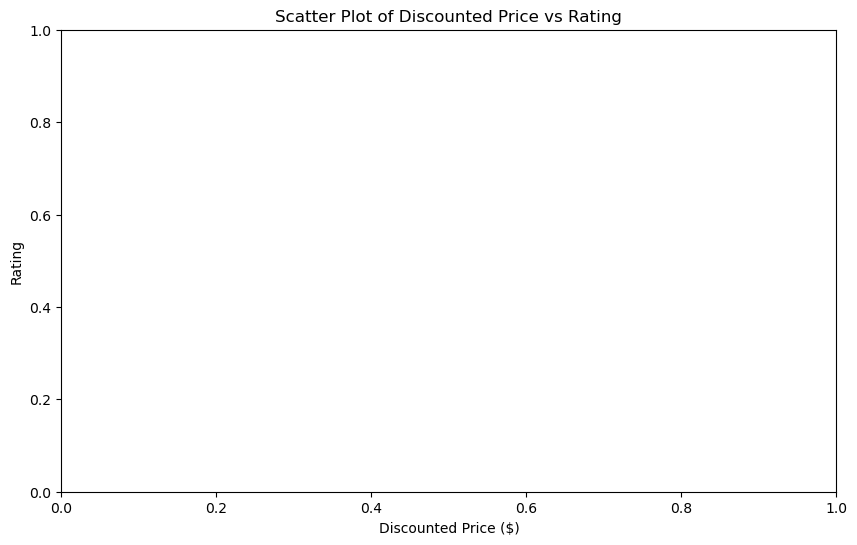

In [187]:
#8.What is the correlation between discounted_price and rating ?


# Step 1: Ensure that 'discounted_price' and 'rating' are numeric
amazon_data['discounted_price'] = pd.to_numeric(amazon_data['discounted_price'], errors='coerce')
amazon_data['rating'] = pd.to_numeric(amazon_data['rating'], errors='coerce')

# Step 2: Calculate the Pearson correlation between 'discounted_price' and 'rating'
correlation = amazon_data[['discounted_price', 'rating']].corr().iloc[0, 1]

# Step 3: Display the correlation value
print(f"Pearson correlation between discounted price and rating: {correlation:.4f}")

# Step 4: Visualize the relationship using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=amazon_data, x='discounted_price', y='rating', color='blue', alpha=0.6)
plt.title('Scatter Plot of Discounted Price vs Rating')
plt.xlabel('Discounted Price ($)')
plt.ylabel('Rating')
plt.show()


In [189]:
#9.' What are the Top 5 categories based on the highest ratings ?


# Step 1: Group by category and calculate the average rating
category_avg_rating = amazon_data.groupby('category')['rating'].mean().reset_index()

# Step 2: Sort the categories by average rating in descending order
category_avg_rating_sorted = category_avg_rating.sort_values('rating', ascending=False)

# Step 3: Get the Top 5 categories with the highest average rating
top_5_categories = category_avg_rating_sorted.head(5)

# Step 4: Display the Top 5 categories with their average rating
print(top_5_categories[['category', 'rating']])


                                             category  rating
4   Computers&Accessories|Accessories&Peripherals|...     5.0
29  Electronics|Mobiles&Accessories|MobileAccessor...     4.6
15  Electronics|HomeAudio|MediaStreamingDevices|St...     4.5
27  Electronics|Mobiles&Accessories|MobileAccessor...     4.4
28  Electronics|Mobiles&Accessories|MobileAccessor...     4.4


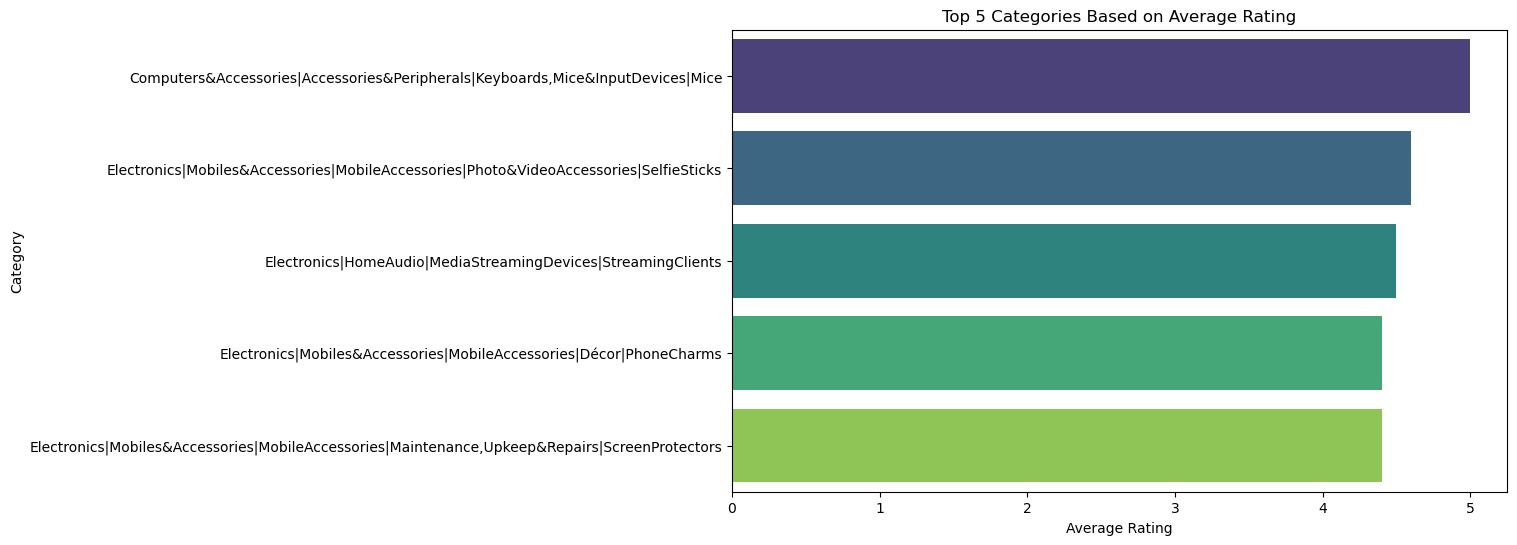

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 5: Visualize the Top 5 categories by average rating
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_categories, x='rating', y='category', palette='viridis')
plt.title('Top 5 Categories Based on Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.show()


In [ ]:
#10. Identify any potential areas for improvement or optimization based on the data analysis ?
''' 
Based on the analysis of the Amazon sales data, here are some potential areas for improvement or optimization that 
can be identified, focusing on both the product-side and business-side strategies.

1. Product Rating Improvement
Observation: Categories or products with lower average ratings could indicate potential issues with product quality, customer satisfaction, or unmet expectations.
Opportunity:
Product Quality Enhancement: If certain categories consistently have lower average ratings (e.g., below 3.5/5), consider investigating these products to improve their quality or features.
Customer Feedback & Reviews: Use customer reviews and ratings to pinpoint specific product issues (e.g., durability, usability). This can guide product improvements or redesigns.
Customer Service: If many reviews are negative, it might indicate issues with customer support or service. Ensuring better customer service could improve ratings.
2. Discount Optimization
Observation: There's a need to examine the relationship between discounted price and rating. It might indicate that high discounts correlate with low ratings, or vice versa, signaling pricing issues.
Opportunity:
Pricing Strategy Review: If a product’s discounted price significantly drops and its rating also drops, consider revisiting your discount strategy. Products with lower ratings might require better quality before aggressive discounting.
Promotions vs. Value: Consider balancing discounts with value addition (bundles, features, or enhancements) rather than just lowering prices.
Targeting the Right Audience: Use customer segmentation (e.g., based on income or product category) to offer tailored discounts that resonate with the target audience.
3. Category Analysis for Sales Growth
Observation: Some product categories are rated more highly than others (as per the Top 5 categories by rating analysis). Categories with lower ratings may indicate a market opportunity if optimized correctly.
Opportunity:
Category Focus: For categories with lower ratings, further investigation into customer complaints or feedback may help reveal areas for improvement. Investing in those categories could yield higher satisfaction and market share.
Category Expansion or Diversification: If a high-rated category (e.g., Electronics) performs well, expanding the product offering in that category could increase sales. For instance, launching new gadgets or accessories that complement existing high-rated products.
Cross-selling & Up-selling: For highly-rated categories, implement strategies like bundling related products or recommending products from the same category.
4. Review Management & Customer Engagement
Observation: The review count and rating count can be correlated to customer engagement levels. Products with more reviews might indicate higher engagement or demand, whereas those with fewer reviews might need better visibility.
Opportunity:
Increase Review Volume: Encourage customers to leave reviews, as products with more reviews can build trust and credibility. This can be done through follow-up emails, reminder notifications, or loyalty rewards for leaving reviews.
Leverage Reviews for Marketing: Positive reviews can be used in marketing campaigns. Highlight highly-rated products on the homepage or in targeted ads to increase sales.
Monitor Negative Reviews: Negative feedback should be quickly addressed. If there are recurring issues with a specific product or category, take corrective action immediately.
5. Discount Percentage vs. Sales Effectiveness
Observation: The discount percentage can be analyzed to determine whether steep discounts are effective in driving higher sales or if a more moderate discount could be more beneficial.
Opportunity:
Discount Optimization: Products with extreme discounts might be a sign of overstock or a need for improved sales strategies. Adjust the discounting strategy to be more targeted—offering timely promotions during key periods (e.g., Black Friday, holiday sales) or targeting specific customer segments.
Dynamic Pricing: Implement dynamic pricing models that adjust based on demand, competition, or inventory. This can help optimize both price and sales volume.
6. Customer Segmentation & Tailored Marketing
Observation: By analyzing customer demographics, like user ratings, annual income, and location, businesses can target more specific customer segments effectively.
Opportunity:
Targeted Offers: Offer specific products to customers based on their buying habits or preferences. For example, high-income customers might prefer higher-end products, while budget-conscious customers may respond better to discounts.
Regional Trends: Consider regional preferences and trends based on Dealer_Region or product categories. Some regions may have higher demand for specific categories (e.g., Sports or Electronics), and personalized marketing strategies can be developed for those regions.
Tailored Recommendations: Use recommendation systems to suggest products based on previous purchases, ratings, and reviews. Personalized recommendations can drive more sales and customer satisfaction.
7. Seasonal Sales Trends
Observation: By analyzing seasonal trends and identifying the months or periods with high or low sales, you can adjust product launches, promotions, or stocking strategies accordingly.
Opportunity:
Seasonal Promotions: If certain months show an increase in sales (e.g., around holidays), plan seasonal marketing campaigns with discounts, bundles, or exclusive offers.
Inventory Optimization: By analyzing the seasonal trends in sales, you can manage stock levels more effectively, ensuring that high-demand products are available during peak seasons without overstocking.
8. Improve Product Description and Images
Observation: A lot of customers base their decisions on product descriptions and images. A well-written description and high-quality images can make a significant impact on the buying decision.
Opportunity:
Enhance Product Information: Ensure that each product has clear, concise, and compelling descriptions. Highlight key features, benefits, and use cases to assist customers in making informed decisions.
Better Product Images: Invest in high-quality, detailed product images that showcase the product from multiple angles. Close-up shots and lifestyle images showing the product in use can increase consumer confidence.
9. Improve User Experience on the Website
Observation: The conversion rate can be affected by the website’s usability, loading speed, and ease of navigating between categories or products.
Opportunity:
Simplify Checkout Process: If data shows high abandoned cart rates, optimize the checkout process by reducing the number of steps or offering quick payment options.
Improve Search and Filters: Ensure that customers can easily search and filter products based on categories, ratings, price, and discount. A more intuitive experience leads to higher sales.
Summary of Key Areas for Improvement:
Product Quality and Customer Feedback: Focus on improving ratings in underperforming categories through product improvements and better customer service.
Optimizing Discount Strategies: Revisit discounting policies to ensure they don't devalue the product while maximizing sales.
Customer Engagement: Improve review volume and quality through better communication and incentives for reviews.
Targeted Marketing: Tailor promotions based on customer demographics, regions, and product categories to increase relevance and conversion rates.
Leveraging Seasonal Trends: Adjust stock, marketing, and promotions based on demand fluctuations.
User Experience: Optimize the website experience, particularly the checkout process and search functionality, to increase conversions.
By focusing on these areas, you can optimize product performance, customer satisfaction, and ultimately, sales.

Let me know if you want a more detailed breakdown of any specific area!





EDA - 4 spotify data

In [193]:
spotify_data = pd.read_csv('spotify.csv')

In [195]:
spotify_data.head()

Artist                               Track Name  Popularity  Duration (ms)  \
0  Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92         319191   
1  Drake                                One Dance          91         173986   
2  Drake                       IDGAF (feat. Yeat)          90         260111   
3  Drake     First Person Shooter (feat. J. Cole)          88         247444   
4  Drake            Jimmy Cooks (feat. 21 Savage)          88         218364   

                 Track ID  
0  1yeB8MUNeLo9Ek1UEpsyz6  
1  1zi7xx7UVEFkmKfv06H8x0  
2  2YSzYUF3jWqb9YP9VXmpjE  
3  7aqfrAY2p9BUSiupwk3svU  
4  3F5CgOj3wFlRv51JsHbxhe

In [197]:
#1.Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful ?
import pandas as pd


# Step 2: Check for Null Values
# This will give a summary of missing data per column
print("\nCheck for Null Values:")
print(spotify_data.isnull().sum())

# Step 3: Handle Null Values
# If null values are present, we can either fill them with a strategy or drop them.
# Example: Filling null values with a placeholder or mean/median
# For numerical columns, we might fill null values with the column's mean or median, and for categorical columns, we can fill with 'Unknown' or a mode value.
spotify_data['Popularity'].fillna(spotify_data['Popularity'].mean(), inplace=True)  # Example for numerical column
spotify_data['Artist'].fillna('Unknown', inplace=True)  # Example for categorical column

# Alternatively, we could drop rows with null values:
# spotify_data.dropna(inplace=True)

# Step 4: Check for Duplicate Rows
# Check for duplicates in the dataset
print("\nCheck for Duplicate Rows:")
duplicate_rows = spotify_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Step 5: Remove Duplicate Rows if present
if duplicate_rows > 0:
    spotify_data.drop_duplicates(inplace=True)

# Step 6: Verify Changes
# Check again for any remaining null values or duplicates
print("\nData after cleaning:")
print(spotify_data.isnull().sum())
print(f"Number of duplicate rows: {spotify_data.duplicated().sum()}")

# Display the first few rows of the cleaned dataset
print("\nCleaned Data:")
print(spotify_data.head())



Check for Null Values:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Check for Duplicate Rows:
Number of duplicate rows: 27

Data after cleaning:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Number of duplicate rows: 0

Cleaned Data:
  Artist                               Track Name  Popularity  Duration (ms)  \
0  Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92         319191   
1  Drake                                One Dance          91         173986   
2  Drake                       IDGAF (feat. Yeat)          90         260111   
3  Drake     First Person Shooter (feat. J. Cole)          88         247444   
4  Drake            Jimmy Cooks (feat. 21 Savage)          88         218364   

                 Track ID  
0  1yeB8MUNeLo9Ek1UEpsyz6  
1  1zi7xx7UVEFkmKfv06H8x0  
2  2YSzYUF3jWqb9YP9VXmpjE  
3  7aqfrAY2p9BUSiupwk3svU  
4  3F5CgOj3wFlRv51

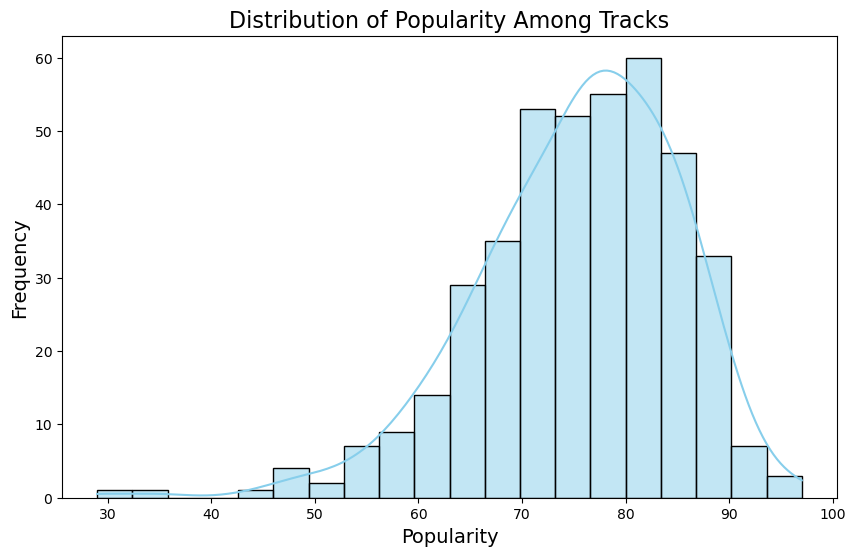

In [199]:
#2.What is the distribution of popularity among the tracks in the data set? Visualize it using a histogram ?

# Step 1: Extract the 'Popularity' column (already present in your cleaned dataset)
popularity = spotify_data['Popularity']

# Step 2: Create a histogram to visualize the distribution of popularity
plt.figure(figsize=(10, 6))
sns.histplot(popularity, bins=20, kde=True, color='skyblue', edgecolor='black')

# Step 3: Add labels and title
plt.title('Distribution of Popularity Among Tracks', fontsize=16)
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()



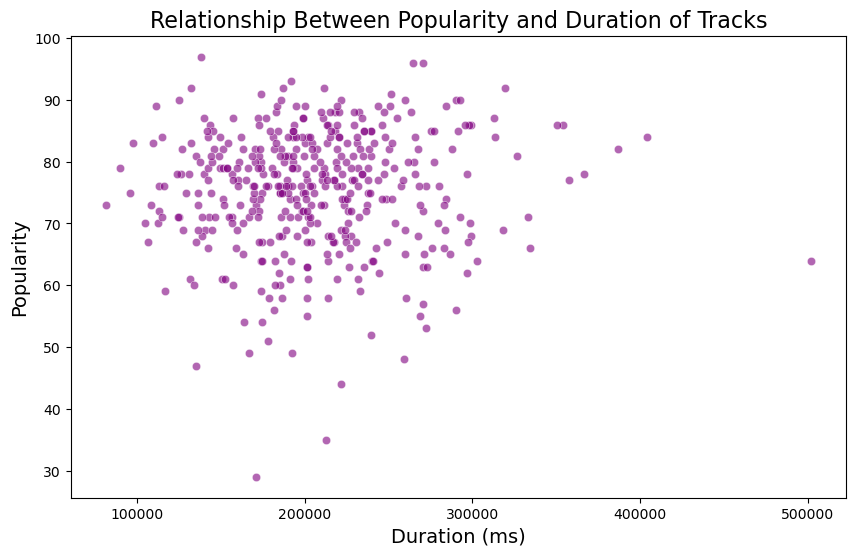

In [201]:
#3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot ?

# Step 1: Extract 'Popularity' and 'Duration (ms)' columns
popularity = spotify_data['Popularity']
duration = spotify_data['Duration (ms)']

# Step 2: Create a scatter plot to explore the relationship between popularity and duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x=duration, y=popularity, color='purple', alpha=0.6)

# Step 3: Add labels and title
plt.title('Relationship Between Popularity and Duration of Tracks', fontsize=16)
plt.xlabel('Duration (ms)', fontsize=14)
plt.ylabel('Popularity', fontsize=14)

# Show the plot
plt.show()


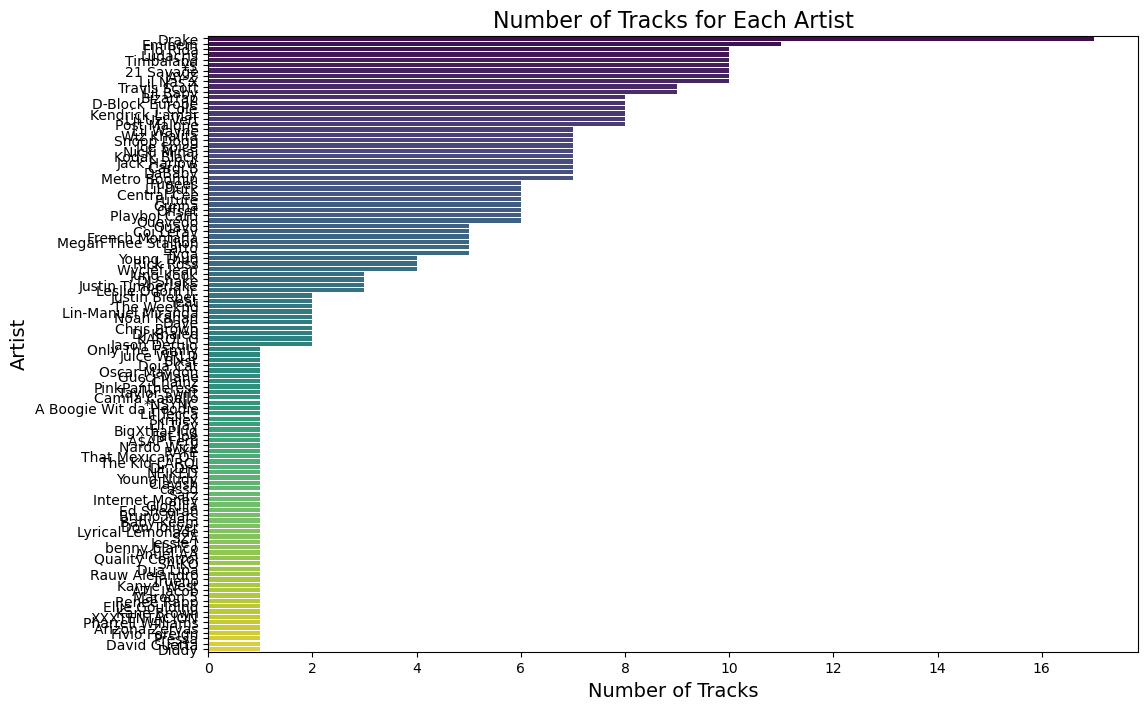

In [203]:
#4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot

# Step 1: Count the number of tracks for each artist
# Using `value_counts` to count the occurrences of each artist in the 'Artist' column
artist_track_counts = spotify_data['Artist'].value_counts()

# Step 2: Create a countplot to display the number of tracks per artist
plt.figure(figsize=(12, 8))
sns.countplot(data=spotify_data, y='Artist', order=artist_track_counts.index, palette='viridis')

# Step 3: Add labels and title
plt.title('Number of Tracks for Each Artist', fontsize=16)
plt.xlabel('Number of Tracks', fontsize=14)
plt.ylabel('Artist', fontsize=14)

# Show the plot
plt.show()


In [205]:
#5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each
# Step 1: Sort the dataset by 'Popularity' in ascending order to get the least popular tracks
least_popular_tracks = spotify_data.sort_values(by='Popularity', ascending=True).head(5)

# Step 2: Display the artist name and track name for the least popular tracks
least_popular_tracks_info = least_popular_tracks[['Artist', 'Track Name', 'Popularity']]

# Display the result
print("Top 5 Least Popular Tracks:")
print(least_popular_tracks_info)


Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [208]:
#6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist ?
# Step 1: Group the dataset by artist and calculate total popularity for each artist
artist_popularity = spotify_data.groupby('Artist')['Popularity'].sum()

# Step 2: Sort the artists by total popularity in descending order and select the top 5 artists
top_5_artists = artist_popularity.sort_values(ascending=False).head(5)

# Step 3: Calculate the average popularity for each of the top 5 artists
top_5_artists_avg_popularity = spotify_data[spotify_data['Artist'].isin(top_5_artists.index)] \
    .groupby('Artist')['Popularity'] \
    .mean() \
    .sort_values(ascending=False)

# Step 4: Display the results
print("Average Popularity for the Top 5 Artists:")
print(top_5_artists_avg_popularity)


Average Popularity for the Top 5 Artists:
Artist
¥$           85.100000
21 Savage    83.800000
Eminem       83.636364
Drake        82.882353
Flo Rida     78.000000
Name: Popularity, dtype: float64


In [210]:
#7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist ?
# Step 1: Group by artist and calculate total popularity for each artist
artist_popularity = spotify_data.groupby('Artist')['Popularity'].sum()

# Step 2: Sort the artists by total popularity and select the top 5 artists
top_5_artists = artist_popularity.sort_values(ascending=False).head(5)

# Step 3: Find the most popular track for each top artist
most_popular_tracks = []

for artist in top_5_artists.index:
    # Filter tracks for the artist and sort them by popularity
    artist_tracks = spotify_data[spotify_data['Artist'] == artist]
    most_popular_track = artist_tracks.sort_values(by='Popularity', ascending=False).iloc[0]
    
    # Append the artist name and most popular track to the list
    most_popular_tracks.append((artist, most_popular_track['Track Name']))

# Step 4: Display the results
print("Most Popular Tracks for the Top 5 Artists:")
for artist, track in most_popular_tracks:
    print(f"Artist: {artist} | Most Popular Track: {track}")


Most Popular Tracks for the Top 5 Artists:
Artist: Drake | Most Popular Track: Rich Baby Daddy (feat. Sexyy Red & SZA)
Artist: Eminem | Most Popular Track: Without Me
Artist: ¥$ | Most Popular Track: CARNIVAL
Artist: 21 Savage | Most Popular Track: redrum
Artist: Flo Rida | Most Popular Track: Low (feat. T-Pain)


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


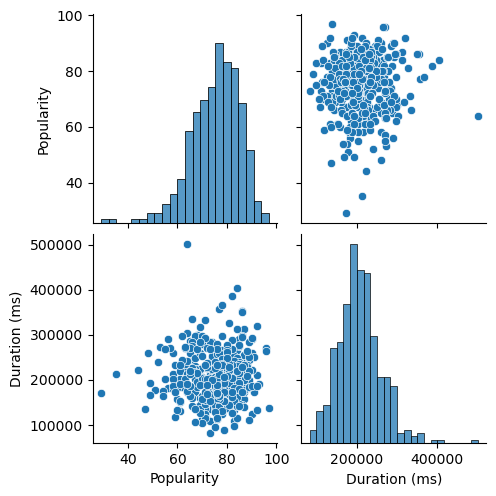

In [214]:
#8.Visualize relationships between multiple numerical variables simultaneously using a pair plot ?

import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Select relevant numerical columns for the pair plot
# In this case, we are selecting 'Popularity' and 'Duration (ms)'
numerical_columns = ['Popularity', 'Duration (ms)']

# Step 2: Create the pair plot
sns.pairplot(spotify_data[numerical_columns])

# Step 3: Display the plot
plt.show()



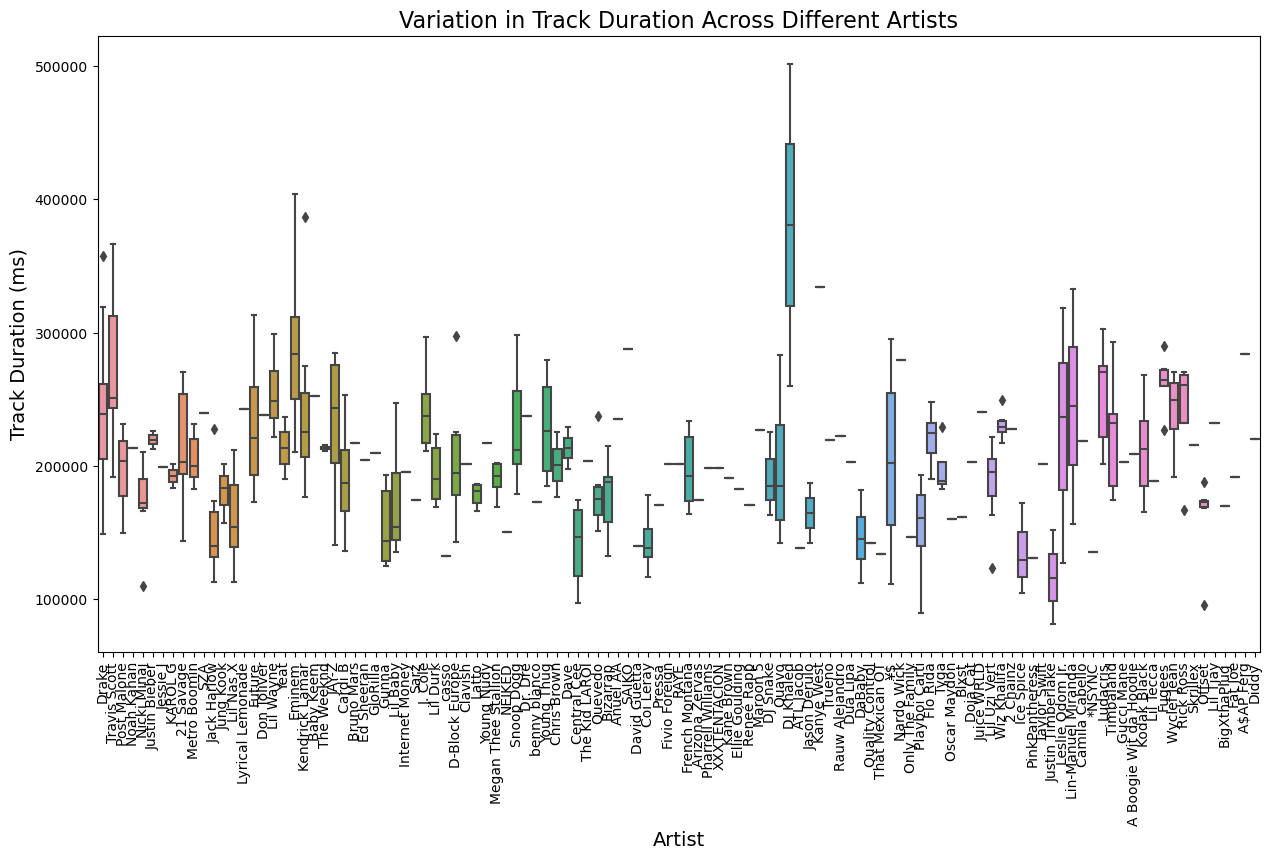

In [216]:
#9.Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot?


# Step 1: Create the boxplot to visualize the variation of track duration across different artists
plt.figure(figsize=(15, 8))
sns.boxplot(x='Artist', y='Duration (ms)', data=spotify_data)

# Step 2: Add titles and labels for clarity
plt.title('Variation in Track Duration Across Different Artists', fontsize=16)
plt.xlabel('Artist', fontsize=14)
plt.ylabel('Track Duration (ms)', fontsize=14)

# Show the plot
plt.xticks(rotation=90)  # Rotate x-axis labels if they overlap
plt.show()


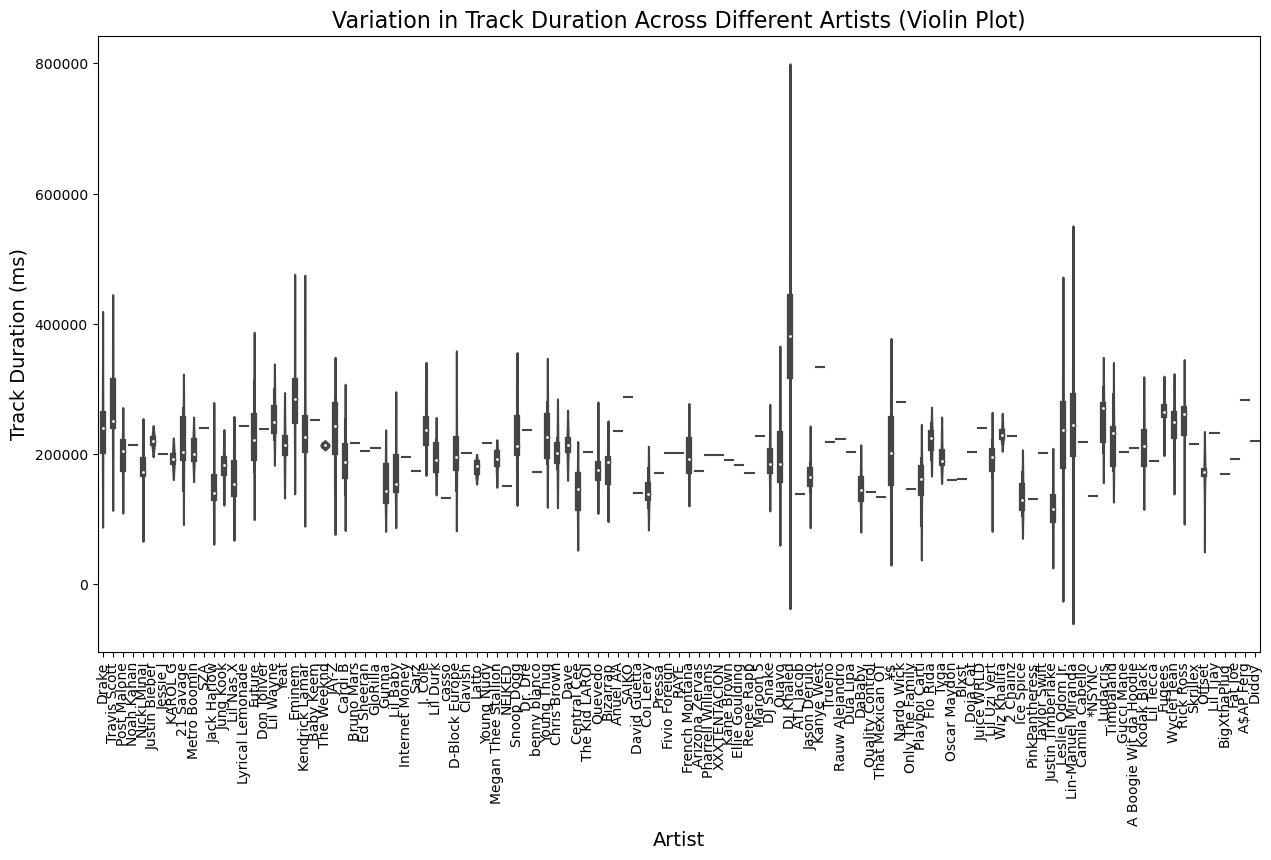

In [218]:
# Step 1: Create the violin plot to visualize the variation of track duration across different artists
plt.figure(figsize=(15, 8))
sns.violinplot(x='Artist', y='Duration (ms)', data=spotify_data)

# Step 2: Add titles and labels for clarity
plt.title('Variation in Track Duration Across Different Artists (Violin Plot)', fontsize=16)
plt.xlabel('Artist', fontsize=14)
plt.ylabel('Track Duration (ms)', fontsize=14)

# Show the plot
plt.xticks(rotation=90)  # Rotate x-axis labels if they overlap
plt.show()


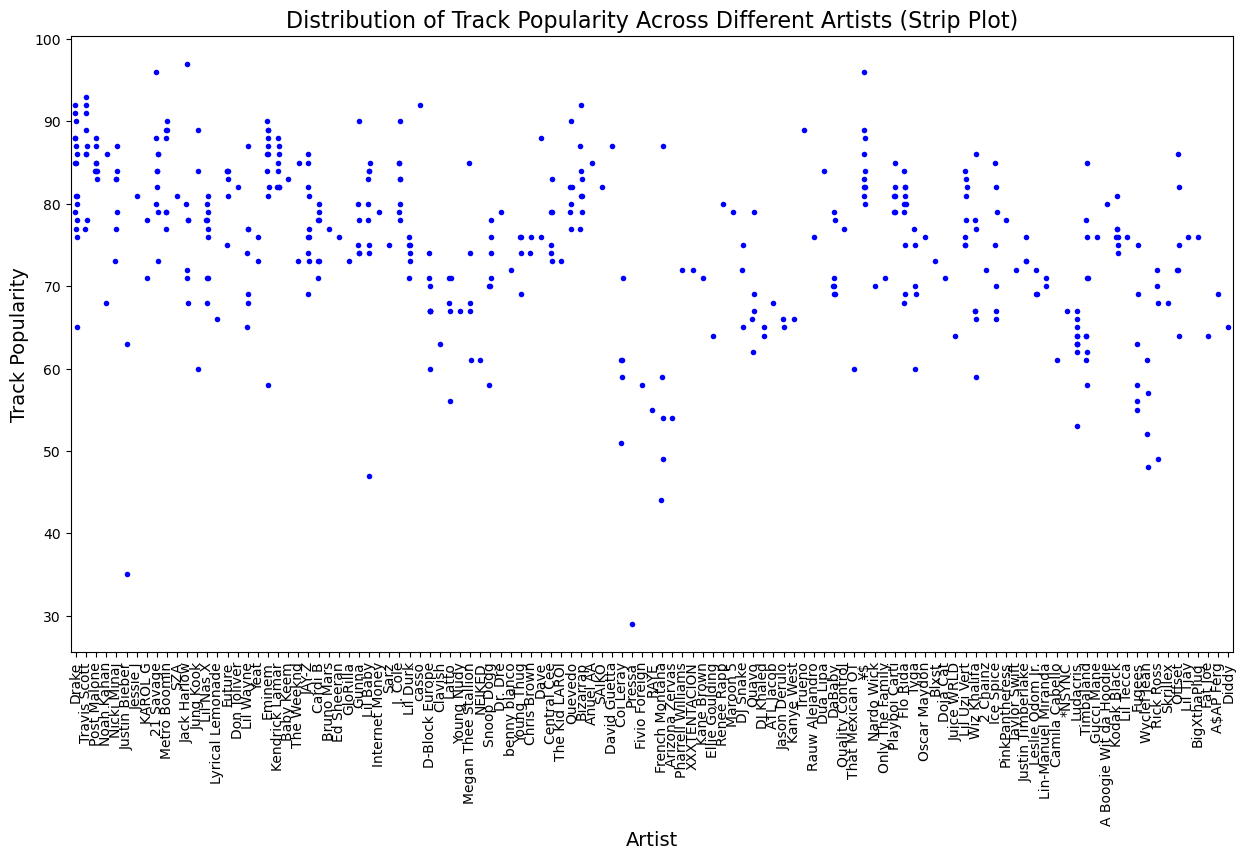

In [226]:
#10.How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create the strip plot
plt.figure(figsize=(15, 8))
sns.stripplot(x='Artist', y='Popularity', data=spotify_data, jitter=True, size=4, color='blue')

# Step 2: Add titles and labels for clarity
plt.title('Distribution of Track Popularity Across Different Artists (Strip Plot)', fontsize=16)
plt.xlabel('Artist', fontsize=14)
plt.ylabel('Track Popularity', fontsize=14)

# Step 3: Rotate x-axis labels to avoid overlap
plt.xticks(rotation=90)

# Show the plot
plt.show()



# Step 1: Create the violin plot to visualize the distribution of track popularity across different artists
plt.figure(figsize=(15, 8))
sns.violinplot(x='Artist', y='Popularity', data=spotify_data)

# Step 2: Add titles and labels for clarity
plt.title('Distribution of Track Popularity Across Different Artists (Violin Plot)', fontsize=16)
plt.xlabel('Artist', fontsize=14)
plt.ylabel('Track Popularity', fontsize=14)

# Step 3: Rotate x-axis labels to avoid overlap
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [ ]:
THANK YOU